## Description

We solve the Neoclassical Growth Model
\begin{align}
  \rho V(k) &= \max_{c} u(c) +  V'(k)(F(k)-\delta k - c) \\
  &u(c) = \frac{c^{1-\sigma}}{1-\sigma},~~~~ F(k)=k^\alpha
\end{align}

## Import

In [1]:
import numpy as np
from numpy import linalg

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Parameters

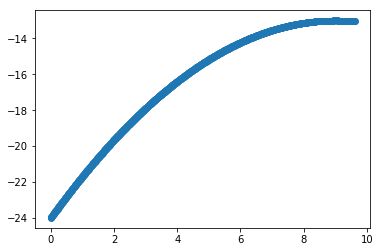

In [2]:
"""PROBLEM PARAMETERS"""
sigma = 2 # 1 changes to log utility
alpha = 0.3
delta = 0.05
rho = 0.05

"""DOMAIN"""
kss = (alpha/(rho+delta))**(1/(1-alpha))
kmin = 0.001*kss
kmax = 2*kss

train_num = 1000
test_num = (train_num*10)-1
"""USE RANDOM INPUT"""
# k_train = np.random.uniform(kmin,kmax,(train_num,1))

"""USE UNIFORM INPUT"""
k_train = np.linspace(kmin, kmax, num=train_num)
k_train = k_train.reshape(train_num,1)

"""INITIAL GUESS"""
def guess1(k) :
    return - 11/81*(k - 9)**2 - 13

def guess2(k) :
    return (1*k**alpha)**(1 - sigma)/(1 - sigma)/rho


v_train = guess1

"""ITERATION PARAMETERS"""
dt = 5*1e-2
criteria = 1e-2
numIterations = 5000

plt.scatter(k_train, v_train(k_train))

## Architecture

In [4]:
def build_model():
#     model = keras.Sequential([
#         layers.Dense(20, activation='tanh', input_shape=(1,)),
#         layers.Dense(20, activation='tanh'),     
#         layers.Dense(20, activation='tanh'),   
#         layers.Dense(1) 
#     ])

    
#     model = tf.keras.Sequential([
#         layers.Dense(20, activation='relu', input_shape=(1,)), 
#         layers.Dense(20, activation='relu'),
#         layers.Dense(20, activation='relu'),
#         layers.Dense(1)
#     ])

#     model = tf.keras.Sequential([
#         layers.Dense(20, activation='softplus', input_shape=(1,)), 
#         layers.Dense(20, activation='softplus'),
#         layers.Dense(20, activation='softplus'),
#         layers.Dense(1)
#     ])

#     model = tf.keras.Sequential([
#         layers.Dense(20, activation='sigmoid', input_shape=(1,)), 
#         layers.Dense(20, activation='sigmoid'),
#         layers.Dense(20, activation='sigmoid'),
#         layers.Dense(1)
#     ])


    model = tf.keras.Sequential([
        layers.Dense(20, activation='elu', input_shape=(1,)), 
        layers.Dense(20, activation='elu'),
        layers.Dense(20, activation='elu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.SGD(lr=1e-3)

    model.compile(optimizer=optimizer,
                  loss='mse')
    return model

In [5]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


## Train on initial guess

In [6]:
model.fit(k_train, v_train(k_train), epochs=500, verbose=1)

Epoch 1/500
1000/1000 [==============================] - 0s 166us/sample - loss: 100.2072
Epoch 2/500
1000/1000 [==============================] - 0s 60us/sample - loss: 29.9885
Epoch 3/500
1000/1000 [==============================] - 0s 54us/sample - loss: 10.8641
Epoch 4/500
1000/1000 [==============================] - 0s 52us/sample - loss: 5.5556
Epoch 5/500
1000/1000 [==============================] - 0s 45us/sample - loss: 3.4232
Epoch 6/500
1000/1000 [==============================] - 0s 44us/sample - loss: 1.4326
Epoch 7/500
1000/1000 [==============================] - 0s 59us/sample - loss: 1.3658
Epoch 8/500
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5566
Epoch 9/500
1000/1000 [==============================] - 0s 49us/sample - loss: 0.5687
Epoch 10/500
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7030
Epoch 11/500
1000/1000 [==============================] - 0s 49us/sample - loss: 0.7149
Epoch 12/500
1000/1000 [============

1000/1000 [==============================] - 0s 39us/sample - loss: 0.0144
Epoch 95/500
1000/1000 [==============================] - 0s 42us/sample - loss: 0.0170
Epoch 96/500
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0136
Epoch 97/500
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0123
Epoch 98/500
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0124
Epoch 99/500
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0125
Epoch 100/500
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0125
Epoch 101/500
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0126
Epoch 102/500
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0148
Epoch 103/500
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0114
Epoch 104/500
1000/1000 [==============================] - 0s 62us/sample - loss: 0.0119
Epoch 105/500
1000/1000 [===============

1000/1000 [==============================] - 0s 35us/sample - loss: 0.0050
Epoch 279/500
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0044
Epoch 280/500
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0045
Epoch 281/500
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0044
Epoch 282/500
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0042
Epoch 283/500
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0041
Epoch 284/500
1000/1000 [==============================] - 0s 42us/sample - loss: 0.0038
Epoch 285/500
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0052
Epoch 286/500
1000/1000 [==============================] - 0s 50us/sample - loss: 0.0040
Epoch 287/500
1000/1000 [==============================] - 0s 60us/sample - loss: 0.0043
Epoch 288/500
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0045
Epoch 289/500
1000/1000 [==========

1000/1000 [==============================] - 0s 32us/sample - loss: 0.0038
Epoch 463/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0031
Epoch 464/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0032
Epoch 465/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0027
Epoch 466/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0025
Epoch 467/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0027
Epoch 468/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0029
Epoch 469/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0031
Epoch 470/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0028
Epoch 471/500
1000/1000 [==============================] - 0s 32us/sample - loss: 0.0030
Epoch 472/500
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0032
Epoch 473/500
1000/1000 [==========

0.03931254523862337


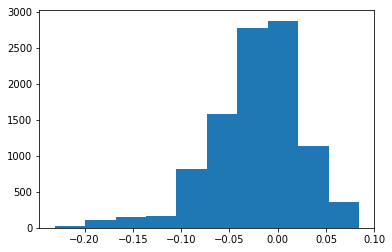

In [7]:
k_test = np.linspace(kmin, kmax, num=test_num)

v_test = v_train(k_test)

error = v_test.reshape(test_num,1) - model.predict([k_test])

print(np.mean(abs(error)))

plt.hist(error, bins=10) 
plt.show()

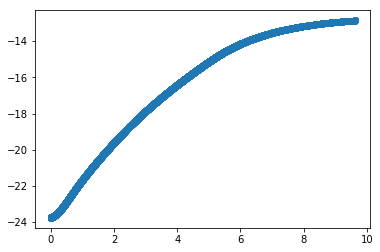

In [8]:
plt.scatter(k_test, model.predict([k_test]))

## Iterate until converged

In [9]:
update = 0
converge_error = 10
iteration_error = np.zeros(numIterations)
inputs = tf.constant(k_train)
while converge_error > criteria and update < numIterations:
        value = model.predict([k_train])

        with tf.GradientTape() as t: #(persistent=True)
            t.watch(inputs)
            output = model(inputs)
            
        derivative = t.gradient(output, inputs).numpy()

        for i in range(train_num):
            derivative[i] = np.maximum(derivative[i], 1e-4)

        # with sigma=2 CRRA utility function
        HJB = (1/np.sqrt(derivative))**(1-sigma)/(1-sigma)+derivative*((k_train)**alpha-delta*k_train-1/np.sqrt(derivative))-rho*value
        value += dt*HJB
    
        model.fit(k_train, value, epochs=10, verbose=0)
        
        converge_error = linalg.norm(HJB,1)
        iteration_error[update] = converge_error
        
        print("update: ", update)
        print("\t infNorm =", max(abs(HJB)))
        print("\t 1Norm = ", converge_error)
        print("\t 2Norm = ", linalg.norm(HJB))
        print("\t mean abs = ", np.mean(abs(HJB)))
        update += 1

update:  0
	 infNorm = [0.40762775]
	 1Norm =  176.33104593707247
	 2Norm =  7.05827819634231
	 mean abs =  0.17633104593707247
update:  1
	 infNorm = [0.42716743]
	 1Norm =  176.29188748664077
	 2Norm =  7.060082630090851
	 mean abs =  0.17629188748664076
update:  2
	 infNorm = [0.44775602]
	 1Norm =  176.2594749301782
	 2Norm =  7.0620202921755455
	 mean abs =  0.17625947493017818
update:  3
	 infNorm = [0.46832883]
	 1Norm =  176.21272577577594
	 2Norm =  7.064512573452726
	 mean abs =  0.17621272577577593
update:  4
	 infNorm = [0.48860328]
	 1Norm =  176.17034856987874
	 2Norm =  7.0682343735382505
	 mean abs =  0.17617034856987873
update:  5
	 infNorm = [0.5087299]
	 1Norm =  176.1145309358281
	 2Norm =  7.07095128624815
	 mean abs =  0.1761145309358281
update:  6
	 infNorm = [0.52838906]
	 1Norm =  176.06012080724958
	 2Norm =  7.073577323963796
	 mean abs =  0.1760601208072496
update:  7
	 infNorm = [0.54821704]
	 1Norm =  175.9839571531079
	 2Norm =  7.076348283578333
	 mean a

update:  64
	 infNorm = [1.45483057]
	 1Norm =  159.59864026454525
	 2Norm =  7.5615981244807875
	 mean abs =  0.15959864026454526
update:  65
	 infNorm = [1.46780389]
	 1Norm =  159.12563973448522
	 2Norm =  7.573199869702381
	 mean abs =  0.1591256397344852
update:  66
	 infNorm = [1.48064992]
	 1Norm =  158.6378981541611
	 2Norm =  7.584305760795121
	 mean abs =  0.1586378981541611
update:  67
	 infNorm = [1.49358349]
	 1Norm =  158.19348092855464
	 2Norm =  7.597964497380139
	 mean abs =  0.15819348092855465
update:  68
	 infNorm = [1.50607048]
	 1Norm =  157.7368055666978
	 2Norm =  7.610763241078391
	 mean abs =  0.1577368055666978
update:  69
	 infNorm = [1.51883865]
	 1Norm =  157.21634063481173
	 2Norm =  7.62212947111792
	 mean abs =  0.15721634063481174
update:  70
	 infNorm = [1.53070552]
	 1Norm =  156.73241352986454
	 2Norm =  7.63163188911028
	 mean abs =  0.15673241352986456
update:  71
	 infNorm = [1.54265205]
	 1Norm =  156.29161690907097
	 2Norm =  7.644509325612471


update:  128
	 infNorm = [2.10793621]
	 1Norm =  127.99880999019652
	 2Norm =  8.212023934526076
	 mean abs =  0.12799880999019653
update:  129
	 infNorm = [2.11614682]
	 1Norm =  127.62215714854645
	 2Norm =  8.220747700835183
	 mean abs =  0.12762215714854644
update:  130
	 infNorm = [2.12458846]
	 1Norm =  127.18213388446566
	 2Norm =  8.22743631744665
	 mean abs =  0.12718213388446567
update:  131
	 infNorm = [2.13253107]
	 1Norm =  126.67702563930898
	 2Norm =  8.230246301439436
	 mean abs =  0.126677025639309
update:  132
	 infNorm = [2.14087928]
	 1Norm =  126.29235829233744
	 2Norm =  8.238109017607224
	 mean abs =  0.12629235829233745
update:  133
	 infNorm = [2.14966767]
	 1Norm =  126.2110053614186
	 2Norm =  8.257236573062833
	 mean abs =  0.1262110053614186
update:  134
	 infNorm = [2.15694877]
	 1Norm =  125.84750131476036
	 2Norm =  8.263771187616483
	 mean abs =  0.12584750131476036
update:  135
	 infNorm = [2.16792134]
	 1Norm =  126.08343947205755
	 2Norm =  8.2901184

update:  191
	 infNorm = [2.52190793]
	 1Norm =  105.08365543620349
	 2Norm =  8.153332744817051
	 mean abs =  0.10508365543620349
update:  192
	 infNorm = [2.52607968]
	 1Norm =  104.08716523002057
	 2Norm =  8.140577921640874
	 mean abs =  0.10408716523002057
update:  193
	 infNorm = [2.53092177]
	 1Norm =  103.59708294499848
	 2Norm =  8.136752896555919
	 mean abs =  0.10359708294499848
update:  194
	 infNorm = [2.5362768]
	 1Norm =  103.31915791215
	 2Norm =  8.12590748715601
	 mean abs =  0.10331915791215
update:  195
	 infNorm = [2.54080565]
	 1Norm =  102.78319973683526
	 2Norm =  8.118728467708925
	 mean abs =  0.10278319973683525
update:  196
	 infNorm = [2.54836002]
	 1Norm =  104.81633568271883
	 2Norm =  8.134335694854093
	 mean abs =  0.10481633568271884
update:  197
	 infNorm = [2.55418711]
	 1Norm =  105.17938791644582
	 2Norm =  8.13302722635154
	 mean abs =  0.10517938791644582
update:  198
	 infNorm = [2.55934625]
	 1Norm =  105.03152582587124
	 2Norm =  8.13029627259

update:  255
	 infNorm = [2.78296774]
	 1Norm =  83.43414185756322
	 2Norm =  7.554712197873864
	 mean abs =  0.08343414185756322
update:  256
	 infNorm = [2.78643478]
	 1Norm =  83.31814877014112
	 2Norm =  7.547453556820716
	 mean abs =  0.08331814877014113
update:  257
	 infNorm = [2.79031389]
	 1Norm =  83.49458244755661
	 2Norm =  7.543787918611588
	 mean abs =  0.08349458244755661
update:  258
	 infNorm = [2.79415554]
	 1Norm =  83.43917098939586
	 2Norm =  7.535130522780143
	 mean abs =  0.08343917098939586
update:  259
	 infNorm = [2.79752987]
	 1Norm =  83.24902925065115
	 2Norm =  7.525586341609045
	 mean abs =  0.08324902925065115
update:  260
	 infNorm = [2.80124486]
	 1Norm =  83.39028656744594
	 2Norm =  7.518739488005458
	 mean abs =  0.08339028656744595
update:  261
	 infNorm = [2.80492913]
	 1Norm =  83.46666626671757
	 2Norm =  7.514216485321317
	 mean abs =  0.08346666626671757
update:  262
	 infNorm = [2.80880651]
	 1Norm =  83.83895671094048
	 2Norm =  7.5112384571

update:  319
	 infNorm = [2.96041617]
	 1Norm =  71.93290868906021
	 2Norm =  7.008568108864179
	 mean abs =  0.07193290868906022
update:  320
	 infNorm = [2.96298008]
	 1Norm =  71.76783568551664
	 2Norm =  6.999362950285431
	 mean abs =  0.07176783568551665
update:  321
	 infNorm = [2.96472297]
	 1Norm =  71.59286098029462
	 2Norm =  6.991463649884582
	 mean abs =  0.07159286098029462
update:  322
	 infNorm = [2.96688007]
	 1Norm =  71.42600019454134
	 2Norm =  6.981352137192613
	 mean abs =  0.07142600019454134
update:  323
	 infNorm = [2.96932659]
	 1Norm =  71.31727596115877
	 2Norm =  6.975674622498624
	 mean abs =  0.07131727596115878
update:  324
	 infNorm = [2.97118162]
	 1Norm =  71.1465741052579
	 2Norm =  6.963783381912514
	 mean abs =  0.0711465741052579
update:  325
	 infNorm = [2.97337711]
	 1Norm =  71.03229430544211
	 2Norm =  6.9572668009188074
	 mean abs =  0.07103229430544211
update:  326
	 infNorm = [2.9760038]
	 1Norm =  70.96540529945182
	 2Norm =  6.956024324126

update:  383
	 infNorm = [3.09196161]
	 1Norm =  66.32118932740343
	 2Norm =  6.709412291130796
	 mean abs =  0.06632118932740343
update:  384
	 infNorm = [3.09331944]
	 1Norm =  66.19980594366868
	 2Norm =  6.701836179796153
	 mean abs =  0.06619980594366869
update:  385
	 infNorm = [3.09516917]
	 1Norm =  66.17456221169316
	 2Norm =  6.70142574674948
	 mean abs =  0.06617456221169316
update:  386
	 infNorm = [3.09578118]
	 1Norm =  66.07259722315519
	 2Norm =  6.6890300118988195
	 mean abs =  0.06607259722315519
update:  387
	 infNorm = [3.09833256]
	 1Norm =  66.01304078844242
	 2Norm =  6.690884088526118
	 mean abs =  0.06601304078844242
update:  388
	 infNorm = [3.10078412]
	 1Norm =  66.0295672846743
	 2Norm =  6.693476284980333
	 mean abs =  0.0660295672846743
update:  389
	 infNorm = [3.10290288]
	 1Norm =  66.08697357430212
	 2Norm =  6.6956024289293445
	 mean abs =  0.06608697357430213
update:  390
	 infNorm = [3.10491328]
	 1Norm =  66.0274006206196
	 2Norm =  6.691443879879

update:  447
	 infNorm = [3.18909774]
	 1Norm =  63.05395700656333
	 2Norm =  6.553141408180827
	 mean abs =  0.06305395700656333
update:  448
	 infNorm = [3.18960812]
	 1Norm =  63.05048882248969
	 2Norm =  6.551511880202317
	 mean abs =  0.06305048882248969
update:  449
	 infNorm = [3.191449]
	 1Norm =  63.02749033794977
	 2Norm =  6.551719806916996
	 mean abs =  0.06302749033794977
update:  450
	 infNorm = [3.19280929]
	 1Norm =  62.959810119675836
	 2Norm =  6.547675494699756
	 mean abs =  0.06295981011967583
update:  451
	 infNorm = [3.1940253]
	 1Norm =  62.93854475546652
	 2Norm =  6.546828927406867
	 mean abs =  0.06293854475546652
update:  452
	 infNorm = [3.19503253]
	 1Norm =  62.86995262761434
	 2Norm =  6.540169529334973
	 mean abs =  0.06286995262761434
update:  453
	 infNorm = [3.19554554]
	 1Norm =  62.960784592264865
	 2Norm =  6.539109380967232
	 mean abs =  0.06296078459226487
update:  454
	 infNorm = [3.19699681]
	 1Norm =  62.90008905817909
	 2Norm =  6.53844913938

update:  511
	 infNorm = [3.26536131]
	 1Norm =  61.09113834599999
	 2Norm =  6.45642135197416
	 mean abs =  0.06109113834599999
update:  512
	 infNorm = [3.26622591]
	 1Norm =  61.06804930632014
	 2Norm =  6.452191935778971
	 mean abs =  0.06106804930632014
update:  513
	 infNorm = [3.26750671]
	 1Norm =  61.01737416196774
	 2Norm =  6.450938066062414
	 mean abs =  0.06101737416196774
update:  514
	 infNorm = [3.26846758]
	 1Norm =  61.027782110277215
	 2Norm =  6.4502877722833665
	 mean abs =  0.061027782110277214
update:  515
	 infNorm = [3.26979875]
	 1Norm =  60.99648690991317
	 2Norm =  6.451645308991534
	 mean abs =  0.060996486909913175
update:  516
	 infNorm = [3.27110525]
	 1Norm =  60.96617561997246
	 2Norm =  6.450161958108506
	 mean abs =  0.06096617561997246
update:  517
	 infNorm = [3.27210714]
	 1Norm =  60.93329535844062
	 2Norm =  6.447677645936014
	 mean abs =  0.060933295358440616
update:  518
	 infNorm = [3.27338783]
	 1Norm =  60.8924294866251
	 2Norm =  6.4462062

update:  575
	 infNorm = [3.32111456]
	 1Norm =  62.314486259895986
	 2Norm =  6.357674132231141
	 mean abs =  0.06231448625989599
update:  576
	 infNorm = [3.32287262]
	 1Norm =  61.64579327537604
	 2Norm =  6.360024754054562
	 mean abs =  0.061645793275376046
update:  577
	 infNorm = [3.32391019]
	 1Norm =  61.538545943870574
	 2Norm =  6.359736388009212
	 mean abs =  0.06153854594387057
update:  578
	 infNorm = [3.32517015]
	 1Norm =  61.20738586744225
	 2Norm =  6.361610972185435
	 mean abs =  0.061207385867442246
update:  579
	 infNorm = [3.32538659]
	 1Norm =  61.582697885432246
	 2Norm =  6.3560232839400514
	 mean abs =  0.06158269788543225
update:  580
	 infNorm = [3.32650122]
	 1Norm =  61.54285909491499
	 2Norm =  6.356899393706326
	 mean abs =  0.06154285909491499
update:  581
	 infNorm = [3.32756489]
	 1Norm =  61.451034323315525
	 2Norm =  6.356066785805595
	 mean abs =  0.06145103432331553
update:  582
	 infNorm = [3.3271953]
	 1Norm =  62.31822179143378
	 2Norm =  6.3508

update:  638
	 infNorm = [3.37989803]
	 1Norm =  59.45275143064809
	 2Norm =  6.3362992779841365
	 mean abs =  0.05945275143064809
update:  639
	 infNorm = [3.38118063]
	 1Norm =  59.253517079522155
	 2Norm =  6.336406381073342
	 mean abs =  0.05925351707952215
update:  640
	 infNorm = [3.38193982]
	 1Norm =  59.23358513336717
	 2Norm =  6.336186595976895
	 mean abs =  0.05923358513336717
update:  641
	 infNorm = [3.38284213]
	 1Norm =  59.18439879500638
	 2Norm =  6.333690202749958
	 mean abs =  0.05918439879500638
update:  642
	 infNorm = [3.38414215]
	 1Norm =  59.06319574390786
	 2Norm =  6.333817632254389
	 mean abs =  0.059063195743907865
update:  643
	 infNorm = [3.38469781]
	 1Norm =  59.09194461559172
	 2Norm =  6.33348690847094
	 mean abs =  0.059091944615591724
update:  644
	 infNorm = [3.38557407]
	 1Norm =  59.09024308657736
	 2Norm =  6.334719717741975
	 mean abs =  0.05909024308657736
update:  645
	 infNorm = [3.38647495]
	 1Norm =  59.034745424792305
	 2Norm =  6.332987

update:  701
	 infNorm = [3.43251063]
	 1Norm =  58.80504186553743
	 2Norm =  6.2968319338687415
	 mean abs =  0.058805041865537436
update:  702
	 infNorm = [3.43316479]
	 1Norm =  58.76301057251864
	 2Norm =  6.296001865196408
	 mean abs =  0.05876301057251864
update:  703
	 infNorm = [3.43381887]
	 1Norm =  58.81348684794069
	 2Norm =  6.293201422096489
	 mean abs =  0.05881348684794069
update:  704
	 infNorm = [3.43401945]
	 1Norm =  58.420226124485424
	 2Norm =  6.288094481495694
	 mean abs =  0.05842022612448543
update:  705
	 infNorm = [3.43471847]
	 1Norm =  58.31020802154461
	 2Norm =  6.285936675884576
	 mean abs =  0.05831020802154461
update:  706
	 infNorm = [3.4352434]
	 1Norm =  58.280698773915304
	 2Norm =  6.2874013087099865
	 mean abs =  0.058280698773915306
update:  707
	 infNorm = [3.43587352]
	 1Norm =  58.325035579193845
	 2Norm =  6.286893403983125
	 mean abs =  0.05832503557919384
update:  708
	 infNorm = [3.4365448]
	 1Norm =  58.34410136922617
	 2Norm =  6.28571

update:  764
	 infNorm = [3.46940495]
	 1Norm =  58.76187696572299
	 2Norm =  6.235819139434327
	 mean abs =  0.05876187696572299
update:  765
	 infNorm = [3.47008066]
	 1Norm =  58.70850775370547
	 2Norm =  6.234146695845922
	 mean abs =  0.058708507753705466
update:  766
	 infNorm = [3.47172105]
	 1Norm =  59.72545753997806
	 2Norm =  6.241336637185282
	 mean abs =  0.05972545753997806
update:  767
	 infNorm = [3.4723029]
	 1Norm =  59.619933870193805
	 2Norm =  6.238233248500898
	 mean abs =  0.059619933870193806
update:  768
	 infNorm = [3.47323077]
	 1Norm =  60.10805225228717
	 2Norm =  6.243962956709728
	 mean abs =  0.06010805225228717
update:  769
	 infNorm = [3.47226368]
	 1Norm =  58.85537534765774
	 2Norm =  6.23939559861565
	 mean abs =  0.058855375347657744
update:  770
	 infNorm = [3.47273323]
	 1Norm =  58.84048924414819
	 2Norm =  6.23916775182459
	 mean abs =  0.05884048924414819
update:  771
	 infNorm = [3.4731196]
	 1Norm =  58.59829295312039
	 2Norm =  6.2360056368

update:  827
	 infNorm = [3.50192012]
	 1Norm =  57.439322516022465
	 2Norm =  6.182005860666243
	 mean abs =  0.05743932251602246
update:  828
	 infNorm = [3.50247368]
	 1Norm =  57.546855339839176
	 2Norm =  6.1827361813521176
	 mean abs =  0.05754685533983918
update:  829
	 infNorm = [3.50311275]
	 1Norm =  57.69889351808777
	 2Norm =  6.183250793625213
	 mean abs =  0.057698893518087775
update:  830
	 infNorm = [3.50358626]
	 1Norm =  57.53173782208515
	 2Norm =  6.180639812498502
	 mean abs =  0.05753173782208515
update:  831
	 infNorm = [3.50366111]
	 1Norm =  57.249393408065664
	 2Norm =  6.177723827298983
	 mean abs =  0.05724939340806567
update:  832
	 infNorm = [3.50439964]
	 1Norm =  57.40798365297593
	 2Norm =  6.178311237718669
	 mean abs =  0.057407983652975926
update:  833
	 infNorm = [3.50517448]
	 1Norm =  57.6812171287447
	 2Norm =  6.1785702114900936
	 mean abs =  0.057681217128744695
update:  834
	 infNorm = [3.50529147]
	 1Norm =  57.38522423500132
	 2Norm =  6.175

update:  890
	 infNorm = [3.52273881]
	 1Norm =  54.50345646579589
	 2Norm =  6.119630924661645
	 mean abs =  0.054503456465795894
update:  891
	 infNorm = [3.52266787]
	 1Norm =  54.24564653687635
	 2Norm =  6.115703423757071
	 mean abs =  0.05424564653687635
update:  892
	 infNorm = [3.52279304]
	 1Norm =  54.158744905541226
	 2Norm =  6.113543469734542
	 mean abs =  0.05415874490554123
update:  893
	 infNorm = [3.52330825]
	 1Norm =  54.213755708730716
	 2Norm =  6.114868718506673
	 mean abs =  0.054213755708730715
update:  894
	 infNorm = [3.52422144]
	 1Norm =  54.52044643688117
	 2Norm =  6.120835850884859
	 mean abs =  0.05452044643688117
update:  895
	 infNorm = [3.52480454]
	 1Norm =  54.54326849449027
	 2Norm =  6.1215873896066375
	 mean abs =  0.05454326849449027
update:  896
	 infNorm = [3.52602556]
	 1Norm =  55.097822560271595
	 2Norm =  6.128004565042098
	 mean abs =  0.0550978225602716
update:  897
	 infNorm = [3.52626532]
	 1Norm =  54.91862933978232
	 2Norm =  6.12477

update:  953
	 infNorm = [3.54474072]
	 1Norm =  55.308467712451076
	 2Norm =  6.110963856758207
	 mean abs =  0.05530846771245108
update:  954
	 infNorm = [3.5442831]
	 1Norm =  54.60397746489635
	 2Norm =  6.102573235694012
	 mean abs =  0.054603977464896356
update:  955
	 infNorm = [3.545321]
	 1Norm =  55.05688406080516
	 2Norm =  6.105333797784949
	 mean abs =  0.05505688406080516
update:  956
	 infNorm = [3.5459001]
	 1Norm =  55.13597529091717
	 2Norm =  6.104632941851594
	 mean abs =  0.055135975290917176
update:  957
	 infNorm = [3.54630665]
	 1Norm =  55.0268161493924
	 2Norm =  6.1003835257213535
	 mean abs =  0.0550268161493924
update:  958
	 infNorm = [3.5469685]
	 1Norm =  55.245916241975955
	 2Norm =  6.101706144462172
	 mean abs =  0.05524591624197595
update:  959
	 infNorm = [3.54648318]
	 1Norm =  54.69492622227559
	 2Norm =  6.094907079624568
	 mean abs =  0.05469492622227559
update:  960
	 infNorm = [3.54774826]
	 1Norm =  55.511431272111466
	 2Norm =  6.10409073842

update:  1016
	 infNorm = [3.5689581]
	 1Norm =  60.113110183869274
	 2Norm =  6.100620742120102
	 mean abs =  0.06011311018386927
update:  1017
	 infNorm = [3.57086436]
	 1Norm =  62.62247803029446
	 2Norm =  6.124353378484999
	 mean abs =  0.06262247803029446
update:  1018
	 infNorm = [3.57075435]
	 1Norm =  61.955366614243076
	 2Norm =  6.116839075878308
	 mean abs =  0.06195536661424308
update:  1019
	 infNorm = [3.57153327]
	 1Norm =  62.82770396908265
	 2Norm =  6.121666889054915
	 mean abs =  0.06282770396908265
update:  1020
	 infNorm = [3.57212975]
	 1Norm =  62.92643568494158
	 2Norm =  6.120947715629697
	 mean abs =  0.06292643568494158
update:  1021
	 infNorm = [3.57222942]
	 1Norm =  62.85446583957859
	 2Norm =  6.118902104779609
	 mean abs =  0.06285446583957859
update:  1022
	 infNorm = [3.57267366]
	 1Norm =  62.92207924200847
	 2Norm =  6.116294578678862
	 mean abs =  0.06292207924200847
update:  1023
	 infNorm = [3.57413049]
	 1Norm =  64.89871169988368
	 2Norm =  6.1

update:  1079
	 infNorm = [3.58235163]
	 1Norm =  57.36934497797499
	 2Norm =  6.024974754433834
	 mean abs =  0.05736934497797499
update:  1080
	 infNorm = [3.5835464]
	 1Norm =  58.538073301683085
	 2Norm =  6.03330518778763
	 mean abs =  0.058538073301683084
update:  1081
	 infNorm = [3.5839484]
	 1Norm =  58.77549036186946
	 2Norm =  6.034888668220704
	 mean abs =  0.05877549036186946
update:  1082
	 infNorm = [3.58434412]
	 1Norm =  58.92850100554247
	 2Norm =  6.034087833992918
	 mean abs =  0.05892850100554247
update:  1083
	 infNorm = [3.58371754]
	 1Norm =  57.732537371842355
	 2Norm =  6.027111166526781
	 mean abs =  0.057732537371842356
update:  1084
	 infNorm = [3.58418666]
	 1Norm =  58.08153815653832
	 2Norm =  6.029488630504457
	 mean abs =  0.05808153815653832
update:  1085
	 infNorm = [3.58458411]
	 1Norm =  58.322643873149666
	 2Norm =  6.032039752468608
	 mean abs =  0.058322643873149664
update:  1086
	 infNorm = [3.58501502]
	 1Norm =  58.66852029072112
	 2Norm =  6

update:  1142
	 infNorm = [3.59161374]
	 1Norm =  55.36220903550719
	 2Norm =  5.997558231138443
	 mean abs =  0.05536220903550719
update:  1143
	 infNorm = [3.59182095]
	 1Norm =  55.35413623239661
	 2Norm =  5.998034051000233
	 mean abs =  0.055354136232396614
update:  1144
	 infNorm = [3.59126384]
	 1Norm =  54.777772211023155
	 2Norm =  5.989265761424509
	 mean abs =  0.05477777221102315
update:  1145
	 infNorm = [3.59157743]
	 1Norm =  54.74063629604369
	 2Norm =  5.987233783962946
	 mean abs =  0.05474063629604369
update:  1146
	 infNorm = [3.59114519]
	 1Norm =  54.86929047976474
	 2Norm =  5.9981541633914865
	 mean abs =  0.05486929047976474
update:  1147
	 infNorm = [3.59132913]
	 1Norm =  54.785008873212284
	 2Norm =  5.99543919762965
	 mean abs =  0.05478500887321228
update:  1148
	 infNorm = [3.5894407]
	 1Norm =  54.29549748465496
	 2Norm =  5.984638574906463
	 mean abs =  0.05429549748465496
update:  1149
	 infNorm = [3.59022497]
	 1Norm =  54.42532400684783
	 2Norm =  5.

update:  1205
	 infNorm = [3.58732133]
	 1Norm =  61.09260066928289
	 2Norm =  5.955478544861914
	 mean abs =  0.06109260066928289
update:  1206
	 infNorm = [3.58763627]
	 1Norm =  61.00899790255853
	 2Norm =  5.953447288413079
	 mean abs =  0.06100899790255852
update:  1207
	 infNorm = [3.5877808]
	 1Norm =  61.03675803759406
	 2Norm =  5.952857465481223
	 mean abs =  0.06103675803759406
update:  1208
	 infNorm = [3.5882075]
	 1Norm =  60.768841134225674
	 2Norm =  5.953036545165497
	 mean abs =  0.060768841134225676
update:  1209
	 infNorm = [3.58848267]
	 1Norm =  60.29830247812011
	 2Norm =  5.950835455118788
	 mean abs =  0.060298302478120104
update:  1210
	 infNorm = [3.58809691]
	 1Norm =  60.75510791542675
	 2Norm =  5.955695880841821
	 mean abs =  0.06075510791542675
update:  1211
	 infNorm = [3.58849163]
	 1Norm =  60.47193702175323
	 2Norm =  5.954138219943987
	 mean abs =  0.06047193702175323
update:  1212
	 infNorm = [3.58928051]
	 1Norm =  59.76253848539375
	 2Norm =  5.9

update:  1268
	 infNorm = [3.59508779]
	 1Norm =  62.85931657010654
	 2Norm =  5.95278713448412
	 mean abs =  0.06285931657010654
update:  1269
	 infNorm = [3.59519305]
	 1Norm =  62.96797392521282
	 2Norm =  5.952126523499388
	 mean abs =  0.06296797392521282
update:  1270
	 infNorm = [3.59536214]
	 1Norm =  63.001821430284
	 2Norm =  5.95088182266264
	 mean abs =  0.063001821430284
update:  1271
	 infNorm = [3.59574967]
	 1Norm =  62.62492181394156
	 2Norm =  5.949986017230286
	 mean abs =  0.06262492181394157
update:  1272
	 infNorm = [3.59626168]
	 1Norm =  62.306053827438475
	 2Norm =  5.947129559673785
	 mean abs =  0.06230605382743847
update:  1273
	 infNorm = [3.59637431]
	 1Norm =  62.370972300029436
	 2Norm =  5.945373928857787
	 mean abs =  0.062370972300029436
update:  1274
	 infNorm = [3.59670505]
	 1Norm =  62.12967420282897
	 2Norm =  5.945290806420758
	 mean abs =  0.06212967420282897
update:  1275
	 infNorm = [3.59690803]
	 1Norm =  62.35809630573554
	 2Norm =  5.94451

update:  1331
	 infNorm = [3.60374989]
	 1Norm =  63.83580961356828
	 2Norm =  5.951312442726473
	 mean abs =  0.06383580961356829
update:  1332
	 infNorm = [3.60396536]
	 1Norm =  63.658875676651604
	 2Norm =  5.951140228692772
	 mean abs =  0.0636588756766516
update:  1333
	 infNorm = [3.60320546]
	 1Norm =  64.51849393815549
	 2Norm =  5.950338757119069
	 mean abs =  0.06451849393815548
update:  1334
	 infNorm = [3.60314492]
	 1Norm =  64.84376977617342
	 2Norm =  5.953983952105852
	 mean abs =  0.06484376977617341
update:  1335
	 infNorm = [3.60333944]
	 1Norm =  64.87166003766572
	 2Norm =  5.95174720193078
	 mean abs =  0.06487166003766572
update:  1336
	 infNorm = [3.60393244]
	 1Norm =  63.863760623646456
	 2Norm =  5.947468519523378
	 mean abs =  0.06386376062364646
update:  1337
	 infNorm = [3.60400454]
	 1Norm =  63.92388338293284
	 2Norm =  5.946192240620684
	 mean abs =  0.06392388338293284
update:  1338
	 infNorm = [3.60350787]
	 1Norm =  64.66171568799548
	 2Norm =  5.95

update:  1394
	 infNorm = [3.60833496]
	 1Norm =  69.08515840341047
	 2Norm =  5.954850120396789
	 mean abs =  0.06908515840341048
update:  1395
	 infNorm = [3.60855378]
	 1Norm =  69.13838816127014
	 2Norm =  5.9529058851198515
	 mean abs =  0.06913838816127015
update:  1396
	 infNorm = [3.6086957]
	 1Norm =  69.26442785514456
	 2Norm =  5.952470386175053
	 mean abs =  0.06926442785514456
update:  1397
	 infNorm = [3.60924991]
	 1Norm =  68.83626235541897
	 2Norm =  5.950624235026837
	 mean abs =  0.06883626235541897
update:  1398
	 infNorm = [3.60866736]
	 1Norm =  69.1896338514243
	 2Norm =  5.958485098950533
	 mean abs =  0.0691896338514243
update:  1399
	 infNorm = [3.60868566]
	 1Norm =  69.51237364888654
	 2Norm =  5.958257744761459
	 mean abs =  0.06951237364888654
update:  1400
	 infNorm = [3.60950291]
	 1Norm =  68.63075017278521
	 2Norm =  5.955572707653245
	 mean abs =  0.06863075017278521
update:  1401
	 infNorm = [3.60986439]
	 1Norm =  67.76744978289639
	 2Norm =  5.9497

update:  1457
	 infNorm = [3.61753911]
	 1Norm =  71.06091254288364
	 2Norm =  5.923264588197357
	 mean abs =  0.07106091254288364
update:  1458
	 infNorm = [3.61722402]
	 1Norm =  71.6674141210218
	 2Norm =  5.925816468745608
	 mean abs =  0.0716674141210218
update:  1459
	 infNorm = [3.61798402]
	 1Norm =  70.36729486500629
	 2Norm =  5.9170870605443655
	 mean abs =  0.07036729486500629
update:  1460
	 infNorm = [3.6174531]
	 1Norm =  71.6711438142093
	 2Norm =  5.923796453588161
	 mean abs =  0.0716711438142093
update:  1461
	 infNorm = [3.61838151]
	 1Norm =  69.81663406283528
	 2Norm =  5.915345641066693
	 mean abs =  0.06981663406283528
update:  1462
	 infNorm = [3.6186807]
	 1Norm =  69.58732086696662
	 2Norm =  5.913644550025349
	 mean abs =  0.06958732086696662
update:  1463
	 infNorm = [3.61905252]
	 1Norm =  69.30377234677366
	 2Norm =  5.910501450397063
	 mean abs =  0.06930377234677365
update:  1464
	 infNorm = [3.61919593]
	 1Norm =  69.42464127624869
	 2Norm =  5.9097705

update:  1520
	 infNorm = [3.62368674]
	 1Norm =  69.99378871058623
	 2Norm =  5.896423162665774
	 mean abs =  0.06999378871058623
update:  1521
	 infNorm = [3.62321416]
	 1Norm =  70.86474249413092
	 2Norm =  5.89870753584548
	 mean abs =  0.07086474249413093
update:  1522
	 infNorm = [3.62377191]
	 1Norm =  70.17771884707435
	 2Norm =  5.895405894387789
	 mean abs =  0.07017771884707434
update:  1523
	 infNorm = [3.62426736]
	 1Norm =  69.44315322210255
	 2Norm =  5.891246938893108
	 mean abs =  0.06944315322210255
update:  1524
	 infNorm = [3.62339668]
	 1Norm =  70.85973307623912
	 2Norm =  5.90152987996119
	 mean abs =  0.07085973307623912
update:  1525
	 infNorm = [3.62425333]
	 1Norm =  69.50070094698322
	 2Norm =  5.896848950253964
	 mean abs =  0.06950070094698321
update:  1526
	 infNorm = [3.62442588]
	 1Norm =  69.46428786107255
	 2Norm =  5.896550256133794
	 mean abs =  0.06946428786107255
update:  1527
	 infNorm = [3.62433169]
	 1Norm =  69.72574930969358
	 2Norm =  5.8971

update:  1583
	 infNorm = [3.62854635]
	 1Norm =  74.18732170822462
	 2Norm =  5.90392750626389
	 mean abs =  0.07418732170822462
update:  1584
	 infNorm = [3.62888797]
	 1Norm =  73.58593001315501
	 2Norm =  5.901176077488655
	 mean abs =  0.07358593001315501
update:  1585
	 infNorm = [3.6291114]
	 1Norm =  73.44447765235405
	 2Norm =  5.899357278652763
	 mean abs =  0.07344447765235405
update:  1586
	 infNorm = [3.62936414]
	 1Norm =  73.42125349650263
	 2Norm =  5.897433034848646
	 mean abs =  0.07342125349650262
update:  1587
	 infNorm = [3.62869752]
	 1Norm =  74.79008347425678
	 2Norm =  5.904602187113331
	 mean abs =  0.07479008347425678
update:  1588
	 infNorm = [3.62795351]
	 1Norm =  75.90908910654771
	 2Norm =  5.910122732615227
	 mean abs =  0.07590908910654771
update:  1589
	 infNorm = [3.62739833]
	 1Norm =  77.18935453525177
	 2Norm =  5.917974268783942
	 mean abs =  0.07718935453525176
update:  1590
	 infNorm = [3.62829183]
	 1Norm =  75.39094630657875
	 2Norm =  5.9064

update:  1646
	 infNorm = [3.6437144]
	 1Norm =  61.07458760165525
	 2Norm =  5.843687653247196
	 mean abs =  0.06107458760165525
update:  1647
	 infNorm = [3.64326753]
	 1Norm =  62.04128809712855
	 2Norm =  5.847252494193778
	 mean abs =  0.06204128809712855
update:  1648
	 infNorm = [3.6434649]
	 1Norm =  61.936017786128005
	 2Norm =  5.845703234680971
	 mean abs =  0.061936017786128006
update:  1649
	 infNorm = [3.64373915]
	 1Norm =  61.74127496766613
	 2Norm =  5.843867183841684
	 mean abs =  0.06174127496766613
update:  1650
	 infNorm = [3.64393282]
	 1Norm =  61.69605925276263
	 2Norm =  5.841438777320572
	 mean abs =  0.06169605925276263
update:  1651
	 infNorm = [3.64341994]
	 1Norm =  63.06787418019579
	 2Norm =  5.840817818875919
	 mean abs =  0.06306787418019578
update:  1652
	 infNorm = [3.6437192]
	 1Norm =  61.81007161258707
	 2Norm =  5.8474341556638105
	 mean abs =  0.06181007161258707
update:  1653
	 infNorm = [3.64401677]
	 1Norm =  61.58220848504196
	 2Norm =  5.84

update:  1709
	 infNorm = [3.65372046]
	 1Norm =  58.42755650770959
	 2Norm =  5.815121940056295
	 mean abs =  0.05842755650770959
update:  1710
	 infNorm = [3.65404747]
	 1Norm =  58.249979171033516
	 2Norm =  5.816842685264333
	 mean abs =  0.058249979171033514
update:  1711
	 infNorm = [3.65475264]
	 1Norm =  57.03825100873085
	 2Norm =  5.815932042597581
	 mean abs =  0.057038251008730854
update:  1712
	 infNorm = [3.655444]
	 1Norm =  56.00862775880522
	 2Norm =  5.814947690791296
	 mean abs =  0.05600862775880522
update:  1713
	 infNorm = [3.65556473]
	 1Norm =  55.957360546281706
	 2Norm =  5.8142749664988225
	 mean abs =  0.055957360546281705
update:  1714
	 infNorm = [3.65523412]
	 1Norm =  56.73031310735282
	 2Norm =  5.816023939312709
	 mean abs =  0.05673031310735282
update:  1715
	 infNorm = [3.65546871]
	 1Norm =  56.54552696061676
	 2Norm =  5.816141150949218
	 mean abs =  0.05654552696061676
update:  1716
	 infNorm = [3.65575553]
	 1Norm =  56.25108260592389
	 2Norm =  

update:  1772
	 infNorm = [3.65998307]
	 1Norm =  59.05943954329173
	 2Norm =  5.8076371422810915
	 mean abs =  0.05905943954329173
update:  1773
	 infNorm = [3.66093294]
	 1Norm =  57.52949857106298
	 2Norm =  5.806956968641066
	 mean abs =  0.05752949857106298
update:  1774
	 infNorm = [3.66108094]
	 1Norm =  57.59521224971889
	 2Norm =  5.806127747771855
	 mean abs =  0.05759521224971889
update:  1775
	 infNorm = [3.66111521]
	 1Norm =  57.71350752618982
	 2Norm =  5.804819347662954
	 mean abs =  0.057713507526189825
update:  1776
	 infNorm = [3.66124555]
	 1Norm =  57.808801379544924
	 2Norm =  5.803517198759006
	 mean abs =  0.05780880137954492
update:  1777
	 infNorm = [3.66138647]
	 1Norm =  57.91188083695232
	 2Norm =  5.802721540952076
	 mean abs =  0.05791188083695232
update:  1778
	 infNorm = [3.66164675]
	 1Norm =  57.779839977832665
	 2Norm =  5.801178080288688
	 mean abs =  0.05777983997783267
update:  1779
	 infNorm = [3.66171958]
	 1Norm =  57.861087411399275
	 2Norm = 

update:  1835
	 infNorm = [3.67121284]
	 1Norm =  54.47892772706867
	 2Norm =  5.796131286286582
	 mean abs =  0.05447892772706867
update:  1836
	 infNorm = [3.67113868]
	 1Norm =  54.500746534628206
	 2Norm =  5.794243469930614
	 mean abs =  0.054500746534628206
update:  1837
	 infNorm = [3.67133475]
	 1Norm =  54.47216445806905
	 2Norm =  5.794872934683679
	 mean abs =  0.05447216445806905
update:  1838
	 infNorm = [3.67145269]
	 1Norm =  54.46956348771995
	 2Norm =  5.794827562383212
	 mean abs =  0.05446956348771995
update:  1839
	 infNorm = [3.67182664]
	 1Norm =  54.39931334421004
	 2Norm =  5.7933423066516045
	 mean abs =  0.05439931334421004
update:  1840
	 infNorm = [3.671589]
	 1Norm =  54.550014278915555
	 2Norm =  5.790352961636452
	 mean abs =  0.05455001427891555
update:  1841
	 infNorm = [3.67180943]
	 1Norm =  54.45385494080962
	 2Norm =  5.791748106506736
	 mean abs =  0.05445385494080962
update:  1842
	 infNorm = [3.67167974]
	 1Norm =  54.65682782242538
	 2Norm =  5.

update:  1898
	 infNorm = [3.67742425]
	 1Norm =  58.452649705668435
	 2Norm =  5.76358456207899
	 mean abs =  0.058452649705668436
update:  1899
	 infNorm = [3.67822919]
	 1Norm =  56.027925694432014
	 2Norm =  5.759548721856175
	 mean abs =  0.05602792569443201
update:  1900
	 infNorm = [3.67840455]
	 1Norm =  55.88560862829745
	 2Norm =  5.759321017043059
	 mean abs =  0.055885608628297445
update:  1901
	 infNorm = [3.67884566]
	 1Norm =  55.58195738030818
	 2Norm =  5.7581736983641605
	 mean abs =  0.05558195738030818
update:  1902
	 infNorm = [3.67878769]
	 1Norm =  55.79237901280709
	 2Norm =  5.756959171243649
	 mean abs =  0.05579237901280709
update:  1903
	 infNorm = [3.67771264]
	 1Norm =  59.08511412073089
	 2Norm =  5.75571655053273
	 mean abs =  0.05908511412073089
update:  1904
	 infNorm = [3.67788047]
	 1Norm =  58.857402536467404
	 2Norm =  5.754998870382941
	 mean abs =  0.0588574025364674
update:  1905
	 infNorm = [3.67874019]
	 1Norm =  56.68917647711714
	 2Norm =  5

update:  1961
	 infNorm = [3.68785305]
	 1Norm =  53.42245115487883
	 2Norm =  5.767036574802633
	 mean abs =  0.05342245115487883
update:  1962
	 infNorm = [3.68781671]
	 1Norm =  53.44166694234873
	 2Norm =  5.765295765702884
	 mean abs =  0.05344166694234873
update:  1963
	 infNorm = [3.68797616]
	 1Norm =  53.408016169870855
	 2Norm =  5.766105955747294
	 mean abs =  0.053408016169870856
update:  1964
	 infNorm = [3.68826374]
	 1Norm =  53.320363380098264
	 2Norm =  5.764710059133038
	 mean abs =  0.05332036338009826
update:  1965
	 infNorm = [3.6877648]
	 1Norm =  53.60144913335421
	 2Norm =  5.768268691956507
	 mean abs =  0.053601449133354205
update:  1966
	 infNorm = [3.68848959]
	 1Norm =  53.34115099068137
	 2Norm =  5.772160961623691
	 mean abs =  0.05334115099068137
update:  1967
	 infNorm = [3.68863629]
	 1Norm =  53.33504096448148
	 2Norm =  5.769765155443564
	 mean abs =  0.05333504096448148
update:  1968
	 infNorm = [3.68878408]
	 1Norm =  53.29983620375558
	 2Norm =  5

update:  2024
	 infNorm = [3.69861253]
	 1Norm =  52.261309343546124
	 2Norm =  5.750378086268992
	 mean abs =  0.05226130934354612
update:  2025
	 infNorm = [3.69886834]
	 1Norm =  52.258189894022806
	 2Norm =  5.750486335285116
	 mean abs =  0.052258189894022804
update:  2026
	 infNorm = [3.69880969]
	 1Norm =  52.203437947372464
	 2Norm =  5.748725345896932
	 mean abs =  0.052203437947372464
update:  2027
	 infNorm = [3.69897408]
	 1Norm =  52.185370995614505
	 2Norm =  5.747947719179024
	 mean abs =  0.0521853709956145
update:  2028
	 infNorm = [3.69825709]
	 1Norm =  52.31745450521862
	 2Norm =  5.755961623647126
	 mean abs =  0.05231745450521862
update:  2029
	 infNorm = [3.69729767]
	 1Norm =  52.524070615726245
	 2Norm =  5.7575793769113774
	 mean abs =  0.05252407061572625
update:  2030
	 infNorm = [3.69695139]
	 1Norm =  52.59228603547523
	 2Norm =  5.754038570464386
	 mean abs =  0.052592286035475236
update:  2031
	 infNorm = [3.69645398]
	 1Norm =  52.91490595140521
	 2Norm

update:  2087
	 infNorm = [3.70406151]
	 1Norm =  51.86670127867579
	 2Norm =  5.73314874225702
	 mean abs =  0.05186670127867579
update:  2088
	 infNorm = [3.70382735]
	 1Norm =  51.8606463947539
	 2Norm =  5.730208434801301
	 mean abs =  0.0518606463947539
update:  2089
	 infNorm = [3.70416263]
	 1Norm =  51.79116562901871
	 2Norm =  5.7280420627694975
	 mean abs =  0.051791165629018705
update:  2090
	 infNorm = [3.70434751]
	 1Norm =  51.779661323280344
	 2Norm =  5.7285895577261945
	 mean abs =  0.051779661323280345
update:  2091
	 infNorm = [3.70433121]
	 1Norm =  51.74942125056659
	 2Norm =  5.727321247335442
	 mean abs =  0.05174942125056659
update:  2092
	 infNorm = [3.70245117]
	 1Norm =  53.3021679978045
	 2Norm =  5.718233797076626
	 mean abs =  0.0533021679978045
update:  2093
	 infNorm = [3.70259704]
	 1Norm =  53.29177291845199
	 2Norm =  5.717317580682081
	 mean abs =  0.05329177291845199
update:  2094
	 infNorm = [3.70153575]
	 1Norm =  54.391580134658355
	 2Norm =  5.7

update:  2150
	 infNorm = [3.69841928]
	 1Norm =  67.02842385136162
	 2Norm =  5.775063592840688
	 mean abs =  0.06702842385136162
update:  2151
	 infNorm = [3.6983199]
	 1Norm =  66.88821624786362
	 2Norm =  5.774310065153273
	 mean abs =  0.06688821624786362
update:  2152
	 infNorm = [3.69862321]
	 1Norm =  66.14115761450205
	 2Norm =  5.773510843754111
	 mean abs =  0.06614115761450205
update:  2153
	 infNorm = [3.69848077]
	 1Norm =  66.82507183761038
	 2Norm =  5.777769026476852
	 mean abs =  0.06682507183761038
update:  2154
	 infNorm = [3.69940141]
	 1Norm =  64.11718516333787
	 2Norm =  5.768697355805278
	 mean abs =  0.06411718516333786
update:  2155
	 infNorm = [3.69856313]
	 1Norm =  64.71352053331101
	 2Norm =  5.778756435866592
	 mean abs =  0.06471352053331102
update:  2156
	 infNorm = [3.69927927]
	 1Norm =  63.29566559847009
	 2Norm =  5.77100577912933
	 mean abs =  0.0632956655984701
update:  2157
	 infNorm = [3.69938257]
	 1Norm =  63.24371963938434
	 2Norm =  5.76948

update:  2213
	 infNorm = [3.70511448]
	 1Norm =  57.75700889494653
	 2Norm =  5.73700914337714
	 mean abs =  0.05775700889494653
update:  2214
	 infNorm = [3.70497116]
	 1Norm =  58.357405404172255
	 2Norm =  5.741826910939525
	 mean abs =  0.05835740540417225
update:  2215
	 infNorm = [3.70408265]
	 1Norm =  60.69814269448902
	 2Norm =  5.748614112589281
	 mean abs =  0.06069814269448902
update:  2216
	 infNorm = [3.7045396]
	 1Norm =  59.787124822213094
	 2Norm =  5.7445994871530335
	 mean abs =  0.05978712482221309
update:  2217
	 infNorm = [3.70487764]
	 1Norm =  59.607859894202015
	 2Norm =  5.741474278731315
	 mean abs =  0.05960785989420202
update:  2218
	 infNorm = [3.70474332]
	 1Norm =  59.65818299317326
	 2Norm =  5.742350226589765
	 mean abs =  0.05965818299317326
update:  2219
	 infNorm = [3.70490752]
	 1Norm =  59.53306031094554
	 2Norm =  5.740532223343782
	 mean abs =  0.05953306031094554
update:  2220
	 infNorm = [3.70498687]
	 1Norm =  59.626418205496755
	 2Norm =  5

update:  2276
	 infNorm = [3.69914469]
	 1Norm =  77.45832761469318
	 2Norm =  5.823999029145265
	 mean abs =  0.07745832761469318
update:  2277
	 infNorm = [3.69949602]
	 1Norm =  76.63301696243528
	 2Norm =  5.8144931244989815
	 mean abs =  0.07663301696243528
update:  2278
	 infNorm = [3.69956946]
	 1Norm =  76.32056086114022
	 2Norm =  5.814442581445957
	 mean abs =  0.07632056086114022
update:  2279
	 infNorm = [3.69976477]
	 1Norm =  75.89860933291997
	 2Norm =  5.809039100532042
	 mean abs =  0.07589860933291998
update:  2280
	 infNorm = [3.69985324]
	 1Norm =  75.82468216151466
	 2Norm =  5.807251876184105
	 mean abs =  0.07582468216151465
update:  2281
	 infNorm = [3.69999353]
	 1Norm =  75.53370994068005
	 2Norm =  5.804239826269426
	 mean abs =  0.07553370994068005
update:  2282
	 infNorm = [3.7001481]
	 1Norm =  75.53572450572712
	 2Norm =  5.802846295451819
	 mean abs =  0.07553572450572711
update:  2283
	 infNorm = [3.70025684]
	 1Norm =  75.44600724304982
	 2Norm =  5.80

update:  2339
	 infNorm = [3.70609783]
	 1Norm =  65.74555696228796
	 2Norm =  5.729027246039889
	 mean abs =  0.06574555696228797
update:  2340
	 infNorm = [3.70647112]
	 1Norm =  65.15167975289367
	 2Norm =  5.724373869625723
	 mean abs =  0.06515167975289367
update:  2341
	 infNorm = [3.70654775]
	 1Norm =  65.57467982949942
	 2Norm =  5.725070509903347
	 mean abs =  0.06557467982949941
update:  2342
	 infNorm = [3.70697093]
	 1Norm =  64.72263739256096
	 2Norm =  5.7210676844294595
	 mean abs =  0.06472263739256096
update:  2343
	 infNorm = [3.70705004]
	 1Norm =  64.47976482996916
	 2Norm =  5.719998205674088
	 mean abs =  0.06447976482996916
update:  2344
	 infNorm = [3.70725387]
	 1Norm =  64.09324898563213
	 2Norm =  5.71753634152487
	 mean abs =  0.06409324898563212
update:  2345
	 infNorm = [3.70742366]
	 1Norm =  63.91356309351809
	 2Norm =  5.71659321889997
	 mean abs =  0.06391356309351809
update:  2346
	 infNorm = [3.70760123]
	 1Norm =  63.55680788226135
	 2Norm =  5.713

update:  2402
	 infNorm = [3.70682565]
	 1Norm =  73.11878180980852
	 2Norm =  5.75928783420202
	 mean abs =  0.07311878180980852
update:  2403
	 infNorm = [3.70606603]
	 1Norm =  75.97564636054472
	 2Norm =  5.783471964741071
	 mean abs =  0.07597564636054471
update:  2404
	 infNorm = [3.70609224]
	 1Norm =  75.9362472254508
	 2Norm =  5.781675243947655
	 mean abs =  0.0759362472254508
update:  2405
	 infNorm = [3.70621315]
	 1Norm =  75.47268320559667
	 2Norm =  5.776812875082599
	 mean abs =  0.07547268320559666
update:  2406
	 infNorm = [3.70653822]
	 1Norm =  74.54934999440634
	 2Norm =  5.769090055742029
	 mean abs =  0.07454934999440634
update:  2407
	 infNorm = [3.70659722]
	 1Norm =  74.47798156237671
	 2Norm =  5.766974553878278
	 mean abs =  0.07447798156237671
update:  2408
	 infNorm = [3.70673575]
	 1Norm =  74.23646822622263
	 2Norm =  5.765600891302575
	 mean abs =  0.07423646822622262
update:  2409
	 infNorm = [3.70622534]
	 1Norm =  76.31499376794827
	 2Norm =  5.78110

update:  2465
	 infNorm = [3.71092754]
	 1Norm =  69.98549178337481
	 2Norm =  5.732587401102529
	 mean abs =  0.0699854917833748
update:  2466
	 infNorm = [3.71039646]
	 1Norm =  69.21624281174023
	 2Norm =  5.739261790552774
	 mean abs =  0.06921624281174023
update:  2467
	 infNorm = [3.7102195]
	 1Norm =  69.59999342225257
	 2Norm =  5.740496620959638
	 mean abs =  0.06959999342225257
update:  2468
	 infNorm = [3.71042439]
	 1Norm =  68.80761412895461
	 2Norm =  5.7423215135894905
	 mean abs =  0.06880761412895461
update:  2469
	 infNorm = [3.71045256]
	 1Norm =  69.03434498585733
	 2Norm =  5.74131895086031
	 mean abs =  0.06903434498585734
update:  2470
	 infNorm = [3.71044681]
	 1Norm =  69.259436476107
	 2Norm =  5.741748791966577
	 mean abs =  0.069259436476107
update:  2471
	 infNorm = [3.71124822]
	 1Norm =  67.74704462372694
	 2Norm =  5.7306838356850776
	 mean abs =  0.06774704462372694
update:  2472
	 infNorm = [3.7113723]
	 1Norm =  67.67632197928089
	 2Norm =  5.72844580

update:  2528
	 infNorm = [3.71435998]
	 1Norm =  69.82609477994102
	 2Norm =  5.732584806097489
	 mean abs =  0.06982609477994102
update:  2529
	 infNorm = [3.71449233]
	 1Norm =  69.73540783072372
	 2Norm =  5.7299721799536725
	 mean abs =  0.06973540783072371
update:  2530
	 infNorm = [3.71481217]
	 1Norm =  69.20396529379528
	 2Norm =  5.725951864213094
	 mean abs =  0.06920396529379527
update:  2531
	 infNorm = [3.71497041]
	 1Norm =  69.01180210244307
	 2Norm =  5.723578381640301
	 mean abs =  0.06901180210244307
update:  2532
	 infNorm = [3.71504122]
	 1Norm =  68.80777731991813
	 2Norm =  5.721310400525809
	 mean abs =  0.06880777731991813
update:  2533
	 infNorm = [3.71518689]
	 1Norm =  68.72254961403559
	 2Norm =  5.720226007916448
	 mean abs =  0.06872254961403558
update:  2534
	 infNorm = [3.71542345]
	 1Norm =  67.88638284553181
	 2Norm =  5.714772321289227
	 mean abs =  0.0678863828455318
update:  2535
	 infNorm = [3.71543458]
	 1Norm =  67.95443157699765
	 2Norm =  5.71

update:  2591
	 infNorm = [3.724112]
	 1Norm =  52.2135489863243
	 2Norm =  5.670224903713073
	 mean abs =  0.0522135489863243
update:  2592
	 infNorm = [3.72416351]
	 1Norm =  52.08335650556498
	 2Norm =  5.674612511323451
	 mean abs =  0.052083356505564976
update:  2593
	 infNorm = [3.7243016]
	 1Norm =  52.060594243388195
	 2Norm =  5.672421908071386
	 mean abs =  0.05206059424338819
update:  2594
	 infNorm = [3.72339288]
	 1Norm =  55.38941741709057
	 2Norm =  5.675022006755358
	 mean abs =  0.05538941741709057
update:  2595
	 infNorm = [3.72319782]
	 1Norm =  56.23950671565708
	 2Norm =  5.673816479961503
	 mean abs =  0.05623950671565708
update:  2596
	 infNorm = [3.72341411]
	 1Norm =  55.739580275337474
	 2Norm =  5.671800417708516
	 mean abs =  0.05573958027533747
update:  2597
	 infNorm = [3.72413717]
	 1Norm =  54.15765145228083
	 2Norm =  5.671216796374091
	 mean abs =  0.05415765145228083
update:  2598
	 infNorm = [3.72444912]
	 1Norm =  53.708110834586975
	 2Norm =  5.668

update:  2654
	 infNorm = [3.73201438]
	 1Norm =  48.55020725510388
	 2Norm =  5.634663538560924
	 mean abs =  0.04855020725510388
update:  2655
	 infNorm = [3.73225193]
	 1Norm =  48.40402541184574
	 2Norm =  5.635318497271269
	 mean abs =  0.048404025411845734
update:  2656
	 infNorm = [3.7326929]
	 1Norm =  48.19075695567911
	 2Norm =  5.633181047371442
	 mean abs =  0.048190756955679113
update:  2657
	 infNorm = [3.73380851]
	 1Norm =  48.17063595483022
	 2Norm =  5.641491278281832
	 mean abs =  0.04817063595483022
update:  2658
	 infNorm = [3.73372235]
	 1Norm =  48.04897469239264
	 2Norm =  5.639139302605692
	 mean abs =  0.04804897469239264
update:  2659
	 infNorm = [3.73463916]
	 1Norm =  48.204673158126894
	 2Norm =  5.639851028737351
	 mean abs =  0.0482046731581269
update:  2660
	 infNorm = [3.7351504]
	 1Norm =  48.60435772325772
	 2Norm =  5.6422799245860515
	 mean abs =  0.04860435772325772
update:  2661
	 infNorm = [3.73504085]
	 1Norm =  48.55465386829374
	 2Norm =  5.6

update:  2717
	 infNorm = [3.7391424]
	 1Norm =  47.07867174108853
	 2Norm =  5.639799897839469
	 mean abs =  0.047078671741088526
update:  2718
	 infNorm = [3.73938078]
	 1Norm =  47.01129444667846
	 2Norm =  5.636272999306336
	 mean abs =  0.04701129444667846
update:  2719
	 infNorm = [3.73955418]
	 1Norm =  46.96903197493367
	 2Norm =  5.6345906203581615
	 mean abs =  0.04696903197493367
update:  2720
	 infNorm = [3.73917051]
	 1Norm =  47.01080032892845
	 2Norm =  5.636897180263863
	 mean abs =  0.047010800328928445
update:  2721
	 infNorm = [3.73919516]
	 1Norm =  47.00587661564629
	 2Norm =  5.640393519651982
	 mean abs =  0.047005876615646286
update:  2722
	 infNorm = [3.73978272]
	 1Norm =  46.95039236939204
	 2Norm =  5.641699931179255
	 mean abs =  0.04695039236939204
update:  2723
	 infNorm = [3.73991873]
	 1Norm =  46.899473408397185
	 2Norm =  5.63980353132441
	 mean abs =  0.04689947340839719
update:  2724
	 infNorm = [3.73949701]
	 1Norm =  47.05047441908292
	 2Norm =  5

update:  2780
	 infNorm = [3.74765717]
	 1Norm =  51.82602417623036
	 2Norm =  5.6623170776840945
	 mean abs =  0.05182602417623036
update:  2781
	 infNorm = [3.74814036]
	 1Norm =  52.417839583048064
	 2Norm =  5.6631298375320895
	 mean abs =  0.05241783958304806
update:  2782
	 infNorm = [3.74831701]
	 1Norm =  52.722217989312625
	 2Norm =  5.664786170166535
	 mean abs =  0.05272221798931263
update:  2783
	 infNorm = [3.74805439]
	 1Norm =  52.08769102627828
	 2Norm =  5.658373165625732
	 mean abs =  0.05208769102627828
update:  2784
	 infNorm = [3.74790431]
	 1Norm =  52.17410049249414
	 2Norm =  5.661656506006906
	 mean abs =  0.052174100492494144
update:  2785
	 infNorm = [3.74841973]
	 1Norm =  52.75750679100953
	 2Norm =  5.662722449890018
	 mean abs =  0.05275750679100953
update:  2786
	 infNorm = [3.74863936]
	 1Norm =  53.401664416796024
	 2Norm =  5.666238361770162
	 mean abs =  0.05340166441679602
update:  2787
	 infNorm = [3.7489429]
	 1Norm =  53.429576889804096
	 2Norm =

update:  2843
	 infNorm = [3.7558021]
	 1Norm =  54.60627776575767
	 2Norm =  5.6502094677743235
	 mean abs =  0.05460627776575767
update:  2844
	 infNorm = [3.75640146]
	 1Norm =  55.84764177901437
	 2Norm =  5.657169380523168
	 mean abs =  0.05584764177901437
update:  2845
	 infNorm = [3.75648862]
	 1Norm =  55.97217577989241
	 2Norm =  5.659088230987548
	 mean abs =  0.055972175779892414
update:  2846
	 infNorm = [3.75663967]
	 1Norm =  56.05021116963794
	 2Norm =  5.659777145685123
	 mean abs =  0.05605021116963794
update:  2847
	 infNorm = [3.75685448]
	 1Norm =  56.19468112780393
	 2Norm =  5.6598916833112645
	 mean abs =  0.05619468112780393
update:  2848
	 infNorm = [3.75692827]
	 1Norm =  55.903413281955146
	 2Norm =  5.655451571351483
	 mean abs =  0.055903413281955146
update:  2849
	 infNorm = [3.75712586]
	 1Norm =  55.88402310251368
	 2Norm =  5.652550740153613
	 mean abs =  0.05588402310251368
update:  2850
	 infNorm = [3.7568177]
	 1Norm =  53.4546418756275
	 2Norm =  5.

update:  2906
	 infNorm = [3.75783597]
	 1Norm =  45.244359294331026
	 2Norm =  5.596522406728113
	 mean abs =  0.04524435929433103
update:  2907
	 infNorm = [3.75768134]
	 1Norm =  45.189610245729924
	 2Norm =  5.5930947297192946
	 mean abs =  0.04518961024572992
update:  2908
	 infNorm = [3.757785]
	 1Norm =  45.16879035228936
	 2Norm =  5.592391267054197
	 mean abs =  0.045168790352289365
update:  2909
	 infNorm = [3.75759007]
	 1Norm =  45.2435716212088
	 2Norm =  5.594038176688699
	 mean abs =  0.0452435716212088
update:  2910
	 infNorm = [3.75753029]
	 1Norm =  45.249799006344375
	 2Norm =  5.5992838750009515
	 mean abs =  0.04524979900634438
update:  2911
	 infNorm = [3.75758008]
	 1Norm =  45.22520886245779
	 2Norm =  5.597267141560328
	 mean abs =  0.04522520886245779
update:  2912
	 infNorm = [3.75680012]
	 1Norm =  45.750110432729535
	 2Norm =  5.591302721793104
	 mean abs =  0.045750110432729536
update:  2913
	 infNorm = [3.75716089]
	 1Norm =  45.4453486854527
	 2Norm =  5

update:  2969
	 infNorm = [3.76034184]
	 1Norm =  45.16237142495613
	 2Norm =  5.582198507896276
	 mean abs =  0.045162371424956126
update:  2970
	 infNorm = [3.76030779]
	 1Norm =  45.0699551093777
	 2Norm =  5.580220628477907
	 mean abs =  0.0450699551093777
update:  2971
	 infNorm = [3.76041115]
	 1Norm =  45.13883618656581
	 2Norm =  5.580905469746704
	 mean abs =  0.04513883618656581
update:  2972
	 infNorm = [3.76066135]
	 1Norm =  45.28157248339784
	 2Norm =  5.581063506723821
	 mean abs =  0.045281572483397835
update:  2973
	 infNorm = [3.76043113]
	 1Norm =  45.15916042873253
	 2Norm =  5.583453571122749
	 mean abs =  0.045159160428732525
update:  2974
	 infNorm = [3.76033653]
	 1Norm =  45.046405415891904
	 2Norm =  5.581931336332255
	 mean abs =  0.0450464054158919
update:  2975
	 infNorm = [3.76047864]
	 1Norm =  45.01271961312286
	 2Norm =  5.580075323842487
	 mean abs =  0.045012719613122865
update:  2976
	 infNorm = [3.7608448]
	 1Norm =  45.3397108284601
	 2Norm =  5.58

update:  3032
	 infNorm = [3.75860457]
	 1Norm =  51.25285256684624
	 2Norm =  5.581388916467213
	 mean abs =  0.05125285256684624
update:  3033
	 infNorm = [3.75855984]
	 1Norm =  53.51288721736764
	 2Norm =  5.588691599547015
	 mean abs =  0.05351288721736764
update:  3034
	 infNorm = [3.75882777]
	 1Norm =  51.8277629204642
	 2Norm =  5.579760722881275
	 mean abs =  0.051827762920464204
update:  3035
	 infNorm = [3.75884967]
	 1Norm =  51.713617665665616
	 2Norm =  5.576027247902249
	 mean abs =  0.051713617665665616
update:  3036
	 infNorm = [3.75878106]
	 1Norm =  51.53960116870094
	 2Norm =  5.575573517317612
	 mean abs =  0.05153960116870094
update:  3037
	 infNorm = [3.75886147]
	 1Norm =  51.64222847792366
	 2Norm =  5.575177520423171
	 mean abs =  0.05164222847792366
update:  3038
	 infNorm = [3.75853471]
	 1Norm =  52.50265628385914
	 2Norm =  5.577167141844187
	 mean abs =  0.05250265628385914
update:  3039
	 infNorm = [3.75841862]
	 1Norm =  52.54046047554314
	 2Norm =  5.

update:  3095
	 infNorm = [3.75861648]
	 1Norm =  54.132060897005715
	 2Norm =  5.5725873852299985
	 mean abs =  0.054132060897005715
update:  3096
	 infNorm = [3.75870435]
	 1Norm =  54.05193237173222
	 2Norm =  5.57053915355508
	 mean abs =  0.05405193237173222
update:  3097
	 infNorm = [3.75876633]
	 1Norm =  53.191215237747784
	 2Norm =  5.568746834825701
	 mean abs =  0.05319121523774779
update:  3098
	 infNorm = [3.7587521]
	 1Norm =  52.920514192893805
	 2Norm =  5.567470922066474
	 mean abs =  0.05292051419289381
update:  3099
	 infNorm = [3.75868719]
	 1Norm =  52.901782148278215
	 2Norm =  5.567117158929739
	 mean abs =  0.05290178214827822
update:  3100
	 infNorm = [3.75871989]
	 1Norm =  53.17874893281766
	 2Norm =  5.566243691082791
	 mean abs =  0.05317874893281766
update:  3101
	 infNorm = [3.75797925]
	 1Norm =  53.60293901059181
	 2Norm =  5.576759670885023
	 mean abs =  0.053602939010591814
update:  3102
	 infNorm = [3.75810192]
	 1Norm =  52.90961978458146
	 2Norm = 

update:  3158
	 infNorm = [3.75832442]
	 1Norm =  45.08675318298256
	 2Norm =  5.5744162272028905
	 mean abs =  0.04508675318298256
update:  3159
	 infNorm = [3.75848739]
	 1Norm =  45.000486133106854
	 2Norm =  5.57153041891448
	 mean abs =  0.04500048613310685
update:  3160
	 infNorm = [3.75864433]
	 1Norm =  44.90811807347305
	 2Norm =  5.569760141960276
	 mean abs =  0.04490811807347305
update:  3161
	 infNorm = [3.75867221]
	 1Norm =  44.89578964824314
	 2Norm =  5.56866197199817
	 mean abs =  0.04489578964824314
update:  3162
	 infNorm = [3.75889852]
	 1Norm =  44.79769936117671
	 2Norm =  5.5673542841760755
	 mean abs =  0.04479769936117671
update:  3163
	 infNorm = [3.75945423]
	 1Norm =  44.56944676201102
	 2Norm =  5.567933314465338
	 mean abs =  0.044569446762011015
update:  3164
	 infNorm = [3.75945731]
	 1Norm =  44.54163245703005
	 2Norm =  5.5652376086428745
	 mean abs =  0.04454163245703005
update:  3165
	 infNorm = [3.75936608]
	 1Norm =  44.59002414023724
	 2Norm =  5

update:  3221
	 infNorm = [3.75806017]
	 1Norm =  49.168050793452885
	 2Norm =  5.547465669131732
	 mean abs =  0.049168050793452885
update:  3222
	 infNorm = [3.7584024]
	 1Norm =  48.787312804981475
	 2Norm =  5.545577439361297
	 mean abs =  0.04878731280498148
update:  3223
	 infNorm = [3.75872005]
	 1Norm =  48.252426488473105
	 2Norm =  5.541852815790127
	 mean abs =  0.0482524264884731
update:  3224
	 infNorm = [3.75877476]
	 1Norm =  48.70022716668518
	 2Norm =  5.5416062382203
	 mean abs =  0.04870022716668518
update:  3225
	 infNorm = [3.75866311]
	 1Norm =  48.96930182010822
	 2Norm =  5.540764447469102
	 mean abs =  0.048969301820108224
update:  3226
	 infNorm = [3.75913954]
	 1Norm =  47.374121485601556
	 2Norm =  5.540186481053363
	 mean abs =  0.04737412148560156
update:  3227
	 infNorm = [3.75917555]
	 1Norm =  47.1938910398841
	 2Norm =  5.53972214237747
	 mean abs =  0.0471938910398841
update:  3228
	 infNorm = [3.75895691]
	 1Norm =  48.078347964023045
	 2Norm =  5.54

update:  3284
	 infNorm = [3.76434409]
	 1Norm =  45.445450225808884
	 2Norm =  5.547017176790538
	 mean abs =  0.045445450225808884
update:  3285
	 infNorm = [3.76445127]
	 1Norm =  45.66946359853217
	 2Norm =  5.549808927158488
	 mean abs =  0.04566946359853217
update:  3286
	 infNorm = [3.76454006]
	 1Norm =  45.8182440189991
	 2Norm =  5.550607035111809
	 mean abs =  0.0458182440189991
update:  3287
	 infNorm = [3.76452925]
	 1Norm =  45.42721921188965
	 2Norm =  5.5484125160844044
	 mean abs =  0.04542721921188965
update:  3288
	 infNorm = [3.76444447]
	 1Norm =  45.22365068279874
	 2Norm =  5.545673207215798
	 mean abs =  0.04522365068279874
update:  3289
	 infNorm = [3.76437383]
	 1Norm =  45.01740126984262
	 2Norm =  5.5449611698422965
	 mean abs =  0.04501740126984262
update:  3290
	 infNorm = [3.76438816]
	 1Norm =  44.83186586644298
	 2Norm =  5.542408197169205
	 mean abs =  0.044831865866442985
update:  3291
	 infNorm = [3.76429166]
	 1Norm =  44.70032095312472
	 2Norm =  5

update:  3347
	 infNorm = [3.76695342]
	 1Norm =  46.54988978055598
	 2Norm =  5.5411757061236555
	 mean abs =  0.04654988978055598
update:  3348
	 infNorm = [3.76688025]
	 1Norm =  46.12339143479943
	 2Norm =  5.539006968444252
	 mean abs =  0.04612339143479943
update:  3349
	 infNorm = [3.76687952]
	 1Norm =  45.87146919006146
	 2Norm =  5.536356785491908
	 mean abs =  0.04587146919006146
update:  3350
	 infNorm = [3.76718257]
	 1Norm =  47.071994576272814
	 2Norm =  5.541602652315633
	 mean abs =  0.04707199457627281
update:  3351
	 infNorm = [3.767236]
	 1Norm =  47.435621653872644
	 2Norm =  5.543673341593419
	 mean abs =  0.04743562165387265
update:  3352
	 infNorm = [3.76746316]
	 1Norm =  47.48593809010115
	 2Norm =  5.541733184275379
	 mean abs =  0.04748593809010115
update:  3353
	 infNorm = [3.76740411]
	 1Norm =  46.9903633905953
	 2Norm =  5.537654230313586
	 mean abs =  0.0469903633905953
update:  3354
	 infNorm = [3.76775408]
	 1Norm =  48.77939460555739
	 2Norm =  5.548

update:  3410
	 infNorm = [3.76665089]
	 1Norm =  44.8332514933125
	 2Norm =  5.549601440783215
	 mean abs =  0.0448332514933125
update:  3411
	 infNorm = [3.76672307]
	 1Norm =  44.79837114419825
	 2Norm =  5.547477748996551
	 mean abs =  0.04479837114419825
update:  3412
	 infNorm = [3.7670861]
	 1Norm =  44.87966331277082
	 2Norm =  5.542520001236359
	 mean abs =  0.04487966331277082
update:  3413
	 infNorm = [3.76723509]
	 1Norm =  44.76550520825167
	 2Norm =  5.538429268635191
	 mean abs =  0.04476550520825167
update:  3414
	 infNorm = [3.76721425]
	 1Norm =  44.694099447166316
	 2Norm =  5.536842712429844
	 mean abs =  0.04469409944716632
update:  3415
	 infNorm = [3.76733473]
	 1Norm =  45.05787437943399
	 2Norm =  5.540017131861332
	 mean abs =  0.04505787437943399
update:  3416
	 infNorm = [3.76724683]
	 1Norm =  44.89461475953166
	 2Norm =  5.539550195278546
	 mean abs =  0.044894614759531666
update:  3417
	 infNorm = [3.76682105]
	 1Norm =  44.83313001152137
	 2Norm =  5.546

update:  3473
	 infNorm = [3.77195856]
	 1Norm =  55.5503121112332
	 2Norm =  5.570943850025918
	 mean abs =  0.055550312111233194
update:  3474
	 infNorm = [3.77215106]
	 1Norm =  55.664434605304194
	 2Norm =  5.570558518590604
	 mean abs =  0.055664434605304194
update:  3475
	 infNorm = [3.77201927]
	 1Norm =  54.955379061857855
	 2Norm =  5.564413663929837
	 mean abs =  0.05495537906185786
update:  3476
	 infNorm = [3.77201884]
	 1Norm =  54.11156921860977
	 2Norm =  5.558290360616532
	 mean abs =  0.054111569218609774
update:  3477
	 infNorm = [3.77189403]
	 1Norm =  53.27194436108315
	 2Norm =  5.551901329621879
	 mean abs =  0.05327194436108315
update:  3478
	 infNorm = [3.77181921]
	 1Norm =  52.82343717906195
	 2Norm =  5.548462976615883
	 mean abs =  0.05282343717906195
update:  3479
	 infNorm = [3.77180812]
	 1Norm =  52.67255963087452
	 2Norm =  5.547538089594448
	 mean abs =  0.05267255963087452
update:  3480
	 infNorm = [3.77186688]
	 1Norm =  52.6257701479032
	 2Norm =  5

update:  3536
	 infNorm = [3.77479343]
	 1Norm =  52.70650439535463
	 2Norm =  5.5327837552957115
	 mean abs =  0.052706504395354625
update:  3537
	 infNorm = [3.77491959]
	 1Norm =  52.69692727324295
	 2Norm =  5.53131539781569
	 mean abs =  0.05269692727324295
update:  3538
	 infNorm = [3.77503142]
	 1Norm =  53.210741063359066
	 2Norm =  5.534435217098499
	 mean abs =  0.05321074106335907
update:  3539
	 infNorm = [3.77465115]
	 1Norm =  51.964490425447295
	 2Norm =  5.527412729570789
	 mean abs =  0.0519644904254473
update:  3540
	 infNorm = [3.77475461]
	 1Norm =  53.01228051533985
	 2Norm =  5.534805115063691
	 mean abs =  0.053012280515339856
update:  3541
	 infNorm = [3.77445086]
	 1Norm =  50.63287261886993
	 2Norm =  5.518847213919543
	 mean abs =  0.05063287261886993
update:  3542
	 infNorm = [3.77437558]
	 1Norm =  50.66606713789011
	 2Norm =  5.524040991882799
	 mean abs =  0.05066606713789011
update:  3543
	 infNorm = [3.77426751]
	 1Norm =  50.06520159274188
	 2Norm =  5

update:  3599
	 infNorm = [3.77767976]
	 1Norm =  55.46379386644217
	 2Norm =  5.538171732216464
	 mean abs =  0.055463793866442165
update:  3600
	 infNorm = [3.77793935]
	 1Norm =  55.5754994995457
	 2Norm =  5.5358951947673445
	 mean abs =  0.0555754994995457
update:  3601
	 infNorm = [3.77786552]
	 1Norm =  55.52129974030082
	 2Norm =  5.536620364169497
	 mean abs =  0.05552129974030082
update:  3602
	 infNorm = [3.77789387]
	 1Norm =  55.5978754102374
	 2Norm =  5.536477360550428
	 mean abs =  0.0555978754102374
update:  3603
	 infNorm = [3.77782185]
	 1Norm =  55.98265673604611
	 2Norm =  5.539670867605048
	 mean abs =  0.05598265673604611
update:  3604
	 infNorm = [3.77771004]
	 1Norm =  55.51886879082422
	 2Norm =  5.536345802947297
	 mean abs =  0.055518868790824225
update:  3605
	 infNorm = [3.77769832]
	 1Norm =  55.520588182950384
	 2Norm =  5.535065443223049
	 mean abs =  0.05552058818295039
update:  3606
	 infNorm = [3.77773023]
	 1Norm =  55.750229083969295
	 2Norm =  5.5

update:  3662
	 infNorm = [3.77982651]
	 1Norm =  56.005800623428826
	 2Norm =  5.524972753106963
	 mean abs =  0.056005800623428824
update:  3663
	 infNorm = [3.77992841]
	 1Norm =  56.644558389402874
	 2Norm =  5.529458240960007
	 mean abs =  0.056644558389402876
update:  3664
	 infNorm = [3.78008004]
	 1Norm =  56.663070474043295
	 2Norm =  5.52829100636467
	 mean abs =  0.056663070474043294
update:  3665
	 infNorm = [3.77975181]
	 1Norm =  55.54855261098429
	 2Norm =  5.523987028651592
	 mean abs =  0.055548552610984285
update:  3666
	 infNorm = [3.77963592]
	 1Norm =  55.19979434261003
	 2Norm =  5.52211984923905
	 mean abs =  0.055199794342610034
update:  3667
	 infNorm = [3.77977243]
	 1Norm =  55.143216460377374
	 2Norm =  5.520604463156341
	 mean abs =  0.05514321646037738
update:  3668
	 infNorm = [3.77952636]
	 1Norm =  54.175915233289686
	 2Norm =  5.517646922846317
	 mean abs =  0.054175915233289684
update:  3669
	 infNorm = [3.7794255]
	 1Norm =  53.738901709659956
	 2Nor

update:  3725
	 infNorm = [3.7788716]
	 1Norm =  54.06834255743825
	 2Norm =  5.529517278503814
	 mean abs =  0.05406834255743825
update:  3726
	 infNorm = [3.77883931]
	 1Norm =  53.97386477343744
	 2Norm =  5.527774343492834
	 mean abs =  0.05397386477343744
update:  3727
	 infNorm = [3.77900245]
	 1Norm =  54.33695623358949
	 2Norm =  5.529261534906164
	 mean abs =  0.05433695623358949
update:  3728
	 infNorm = [3.77905856]
	 1Norm =  54.39078021155957
	 2Norm =  5.5304898961180795
	 mean abs =  0.054390780211559575
update:  3729
	 infNorm = [3.77907854]
	 1Norm =  54.293322629876364
	 2Norm =  5.5281233066898725
	 mean abs =  0.054293322629876364
update:  3730
	 infNorm = [3.77903426]
	 1Norm =  53.96345926912571
	 2Norm =  5.524468124028552
	 mean abs =  0.053963459269125706
update:  3731
	 infNorm = [3.77901252]
	 1Norm =  53.120008480619745
	 2Norm =  5.516854567825133
	 mean abs =  0.05312000848061975
update:  3732
	 infNorm = [3.77916103]
	 1Norm =  53.2011101142377
	 2Norm = 

update:  3788
	 infNorm = [3.78104733]
	 1Norm =  57.472114344239046
	 2Norm =  5.518886640909634
	 mean abs =  0.057472114344239045
update:  3789
	 infNorm = [3.78070451]
	 1Norm =  57.69063024200207
	 2Norm =  5.523991157432571
	 mean abs =  0.05769063024200207
update:  3790
	 infNorm = [3.78055912]
	 1Norm =  57.44080692015427
	 2Norm =  5.524919878633044
	 mean abs =  0.057440806920154276
update:  3791
	 infNorm = [3.78010542]
	 1Norm =  54.33807823480754
	 2Norm =  5.503490447650106
	 mean abs =  0.05433807823480754
update:  3792
	 infNorm = [3.78034181]
	 1Norm =  54.37417431143322
	 2Norm =  5.499908394216414
	 mean abs =  0.054374174311433224
update:  3793
	 infNorm = [3.78030211]
	 1Norm =  54.36469581495939
	 2Norm =  5.499767731547597
	 mean abs =  0.05436469581495939
update:  3794
	 infNorm = [3.78030108]
	 1Norm =  54.18001406053503
	 2Norm =  5.497159473688664
	 mean abs =  0.05418001406053503
update:  3795
	 infNorm = [3.78022703]
	 1Norm =  54.240912353122795
	 2Norm = 

update:  3851
	 infNorm = [3.77905305]
	 1Norm =  50.35365256950615
	 2Norm =  5.4833543726128315
	 mean abs =  0.05035365256950615
update:  3852
	 infNorm = [3.77901997]
	 1Norm =  50.46621962244072
	 2Norm =  5.482920317379449
	 mean abs =  0.05046621962244072
update:  3853
	 infNorm = [3.77871226]
	 1Norm =  50.28333756026813
	 2Norm =  5.483933643199497
	 mean abs =  0.05028333756026813
update:  3854
	 infNorm = [3.7787581]
	 1Norm =  50.4269587462828
	 2Norm =  5.483733208735691
	 mean abs =  0.0504269587462828
update:  3855
	 infNorm = [3.77878736]
	 1Norm =  50.93217339843402
	 2Norm =  5.485318004791314
	 mean abs =  0.05093217339843402
update:  3856
	 infNorm = [3.77850826]
	 1Norm =  50.21773715961562
	 2Norm =  5.48467600332688
	 mean abs =  0.050217737159615625
update:  3857
	 infNorm = [3.77872277]
	 1Norm =  51.18668682969202
	 2Norm =  5.488027604822608
	 mean abs =  0.05118668682969202
update:  3858
	 infNorm = [3.77878123]
	 1Norm =  51.44230367058538
	 2Norm =  5.4887

update:  3914
	 infNorm = [3.77944539]
	 1Norm =  59.05840976710994
	 2Norm =  5.52831957910206
	 mean abs =  0.059058409767109944
update:  3915
	 infNorm = [3.77927978]
	 1Norm =  58.268834422850226
	 2Norm =  5.522183470847438
	 mean abs =  0.058268834422850226
update:  3916
	 infNorm = [3.77944425]
	 1Norm =  58.65720615301112
	 2Norm =  5.52376982408593
	 mean abs =  0.058657206153011114
update:  3917
	 infNorm = [3.77937323]
	 1Norm =  58.73493404543174
	 2Norm =  5.5271697496712475
	 mean abs =  0.058734934045431744
update:  3918
	 infNorm = [3.7793345]
	 1Norm =  58.84261838795034
	 2Norm =  5.5277311564687714
	 mean abs =  0.05884261838795034
update:  3919
	 infNorm = [3.77912831]
	 1Norm =  58.10434691388882
	 2Norm =  5.522929124984089
	 mean abs =  0.05810434691388882
update:  3920
	 infNorm = [3.77911908]
	 1Norm =  58.33328402233778
	 2Norm =  5.524587307501196
	 mean abs =  0.05833328402233778
update:  3921
	 infNorm = [3.77910848]
	 1Norm =  58.573844673950994
	 2Norm = 

update:  3977
	 infNorm = [3.78127355]
	 1Norm =  61.472786389377376
	 2Norm =  5.524781300535391
	 mean abs =  0.06147278638937738
update:  3978
	 infNorm = [3.7812153]
	 1Norm =  60.849218412237484
	 2Norm =  5.519937382456846
	 mean abs =  0.060849218412237484
update:  3979
	 infNorm = [3.78155449]
	 1Norm =  62.69291596371981
	 2Norm =  5.536368085526623
	 mean abs =  0.06269291596371981
update:  3980
	 infNorm = [3.78174415]
	 1Norm =  63.35641725522207
	 2Norm =  5.541713096963622
	 mean abs =  0.06335641725522206
update:  3981
	 infNorm = [3.78184315]
	 1Norm =  62.904216266158116
	 2Norm =  5.534433030424298
	 mean abs =  0.06290421626615812
update:  3982
	 infNorm = [3.78171837]
	 1Norm =  62.39547784798202
	 2Norm =  5.533367865099856
	 mean abs =  0.06239547784798202
update:  3983
	 infNorm = [3.7817194]
	 1Norm =  62.32338257240768
	 2Norm =  5.5324696936115565
	 mean abs =  0.06232338257240768
update:  3984
	 infNorm = [3.78194976]
	 1Norm =  62.53085839301694
	 2Norm =  5

update:  4040
	 infNorm = [3.78095659]
	 1Norm =  62.29962593737826
	 2Norm =  5.537351544172222
	 mean abs =  0.06229962593737826
update:  4041
	 infNorm = [3.78091382]
	 1Norm =  61.93487741371918
	 2Norm =  5.532918174425453
	 mean abs =  0.061934877413719176
update:  4042
	 infNorm = [3.78112619]
	 1Norm =  61.93912588313627
	 2Norm =  5.530087726743274
	 mean abs =  0.06193912588313627
update:  4043
	 infNorm = [3.78112047]
	 1Norm =  61.97940363095478
	 2Norm =  5.530317432485869
	 mean abs =  0.06197940363095478
update:  4044
	 infNorm = [3.78104787]
	 1Norm =  62.006812701446066
	 2Norm =  5.529552585548608
	 mean abs =  0.06200681270144606
update:  4045
	 infNorm = [3.7811828]
	 1Norm =  61.98542675567619
	 2Norm =  5.527557605378806
	 mean abs =  0.061985426755676185
update:  4046
	 infNorm = [3.78113385]
	 1Norm =  62.1749426400292
	 2Norm =  5.530614989919479
	 mean abs =  0.0621749426400292
update:  4047
	 infNorm = [3.78144813]
	 1Norm =  62.44659121862177
	 2Norm =  5.53

update:  4103
	 infNorm = [3.78125741]
	 1Norm =  62.66111754176019
	 2Norm =  5.529313425690648
	 mean abs =  0.0626611175417602
update:  4104
	 infNorm = [3.78118294]
	 1Norm =  62.56816456738877
	 2Norm =  5.5283530984587275
	 mean abs =  0.06256816456738877
update:  4105
	 infNorm = [3.78116454]
	 1Norm =  62.60603786140348
	 2Norm =  5.529432790800163
	 mean abs =  0.06260603786140348
update:  4106
	 infNorm = [3.78105583]
	 1Norm =  61.67318384579847
	 2Norm =  5.52003226397539
	 mean abs =  0.06167318384579847
update:  4107
	 infNorm = [3.78102754]
	 1Norm =  61.666473992968726
	 2Norm =  5.519495299322602
	 mean abs =  0.06166647399296873
update:  4108
	 infNorm = [3.78109813]
	 1Norm =  61.76686310655704
	 2Norm =  5.519470543289329
	 mean abs =  0.06176686310655704
update:  4109
	 infNorm = [3.78123954]
	 1Norm =  62.66710596218271
	 2Norm =  5.527359997543405
	 mean abs =  0.06266710596218271
update:  4110
	 infNorm = [3.78129224]
	 1Norm =  63.15006742353819
	 2Norm =  5.52

update:  4166
	 infNorm = [3.78298165]
	 1Norm =  66.69554611742359
	 2Norm =  5.5491181722774705
	 mean abs =  0.0666955461174236
update:  4167
	 infNorm = [3.78296091]
	 1Norm =  66.51880458107152
	 2Norm =  5.546710596425648
	 mean abs =  0.06651880458107153
update:  4168
	 infNorm = [3.7827878]
	 1Norm =  66.18009334534486
	 2Norm =  5.545496029257815
	 mean abs =  0.06618009334534486
update:  4169
	 infNorm = [3.7828434]
	 1Norm =  66.1341958793966
	 2Norm =  5.544479010745047
	 mean abs =  0.0661341958793966
update:  4170
	 infNorm = [3.7822775]
	 1Norm =  65.99979327238773
	 2Norm =  5.556636681902396
	 mean abs =  0.06599979327238774
update:  4171
	 infNorm = [3.78221468]
	 1Norm =  66.04002068395232
	 2Norm =  5.558003568310716
	 mean abs =  0.06604002068395232
update:  4172
	 infNorm = [3.78230693]
	 1Norm =  66.12211386714162
	 2Norm =  5.556087977878609
	 mean abs =  0.06612211386714162
update:  4173
	 infNorm = [3.7824107]
	 1Norm =  66.08931120264862
	 2Norm =  5.55383900

update:  4229
	 infNorm = [3.78271625]
	 1Norm =  62.945085403442434
	 2Norm =  5.513878738298427
	 mean abs =  0.06294508540344243
update:  4230
	 infNorm = [3.78278619]
	 1Norm =  63.036194532643385
	 2Norm =  5.5144845373897775
	 mean abs =  0.06303619453264339
update:  4231
	 infNorm = [3.7828498]
	 1Norm =  63.21017112582275
	 2Norm =  5.515026711202203
	 mean abs =  0.06321017112582275
update:  4232
	 infNorm = [3.78289115]
	 1Norm =  63.730462874890826
	 2Norm =  5.520317454741156
	 mean abs =  0.06373046287489083
update:  4233
	 infNorm = [3.7829557]
	 1Norm =  64.28473812902604
	 2Norm =  5.525563658896721
	 mean abs =  0.06428473812902603
update:  4234
	 infNorm = [3.78294639]
	 1Norm =  63.954504682633605
	 2Norm =  5.521113857739413
	 mean abs =  0.06395450468263361
update:  4235
	 infNorm = [3.78272489]
	 1Norm =  62.82156133306576
	 2Norm =  5.510701856219696
	 mean abs =  0.06282156133306575
update:  4236
	 infNorm = [3.78275988]
	 1Norm =  62.8781556013788
	 2Norm =  5.

update:  4292
	 infNorm = [3.78163239]
	 1Norm =  56.55848500365651
	 2Norm =  5.452782263430975
	 mean abs =  0.056558485003656504
update:  4293
	 infNorm = [3.78154965]
	 1Norm =  56.579492152101736
	 2Norm =  5.452212087750087
	 mean abs =  0.056579492152101736
update:  4294
	 infNorm = [3.78159421]
	 1Norm =  56.558908413488865
	 2Norm =  5.449656642478076
	 mean abs =  0.056558908413488866
update:  4295
	 infNorm = [3.78160008]
	 1Norm =  56.45718582052189
	 2Norm =  5.447513372252814
	 mean abs =  0.056457185820521893
update:  4296
	 infNorm = [3.78153373]
	 1Norm =  56.37356404945476
	 2Norm =  5.446636026843747
	 mean abs =  0.056373564049454754
update:  4297
	 infNorm = [3.78148693]
	 1Norm =  56.65208257570417
	 2Norm =  5.450091226971464
	 mean abs =  0.05665208257570417
update:  4298
	 infNorm = [3.78126585]
	 1Norm =  56.52091968691438
	 2Norm =  5.450531575184739
	 mean abs =  0.05652091968691438
update:  4299
	 infNorm = [3.78112145]
	 1Norm =  56.60472940550837
	 2Norm 

update:  4355
	 infNorm = [3.7795893]
	 1Norm =  59.29813641329906
	 2Norm =  5.4680758888564105
	 mean abs =  0.05929813641329906
update:  4356
	 infNorm = [3.77954729]
	 1Norm =  59.364706347667514
	 2Norm =  5.468026201674841
	 mean abs =  0.059364706347667516
update:  4357
	 infNorm = [3.77961774]
	 1Norm =  59.374755547770235
	 2Norm =  5.467129243404844
	 mean abs =  0.05937475554777023
update:  4358
	 infNorm = [3.77925644]
	 1Norm =  58.34147418022151
	 2Norm =  5.4657143126448915
	 mean abs =  0.05834147418022151
update:  4359
	 infNorm = [3.77908405]
	 1Norm =  57.90270724469575
	 2Norm =  5.462657038637643
	 mean abs =  0.05790270724469575
update:  4360
	 infNorm = [3.77899441]
	 1Norm =  57.78602398944326
	 2Norm =  5.461149683971104
	 mean abs =  0.057786023989443255
update:  4361
	 infNorm = [3.77906787]
	 1Norm =  58.32132201088436
	 2Norm =  5.463679713828762
	 mean abs =  0.05832132201088436
update:  4362
	 infNorm = [3.77902641]
	 1Norm =  58.34297930901853
	 2Norm = 

update:  4418
	 infNorm = [3.77867288]
	 1Norm =  61.54177003603074
	 2Norm =  5.483107658439901
	 mean abs =  0.061541770036030743
update:  4419
	 infNorm = [3.77874037]
	 1Norm =  61.520261369141195
	 2Norm =  5.484210154525457
	 mean abs =  0.061520261369141196
update:  4420
	 infNorm = [3.77871558]
	 1Norm =  61.188289178848606
	 2Norm =  5.481890745895621
	 mean abs =  0.06118828917884861
update:  4421
	 infNorm = [3.77885507]
	 1Norm =  62.030047633434684
	 2Norm =  5.486887054088572
	 mean abs =  0.062030047633434685
update:  4422
	 infNorm = [3.77886158]
	 1Norm =  62.34622784101963
	 2Norm =  5.489098661535308
	 mean abs =  0.06234622784101963
update:  4423
	 infNorm = [3.7786653]
	 1Norm =  62.17739187822316
	 2Norm =  5.490689342466173
	 mean abs =  0.06217739187822316
update:  4424
	 infNorm = [3.77876218]
	 1Norm =  62.46208134776313
	 2Norm =  5.4912553041309655
	 mean abs =  0.06246208134776313
update:  4425
	 infNorm = [3.77868806]
	 1Norm =  62.5734832759394
	 2Norm = 

update:  4481
	 infNorm = [3.77856286]
	 1Norm =  57.66260272951584
	 2Norm =  5.425137177034425
	 mean abs =  0.05766260272951584
update:  4482
	 infNorm = [3.77842739]
	 1Norm =  56.91273456042103
	 2Norm =  5.419582824656987
	 mean abs =  0.05691273456042103
update:  4483
	 infNorm = [3.77840664]
	 1Norm =  56.748066708268816
	 2Norm =  5.417348439480427
	 mean abs =  0.05674806670826882
update:  4484
	 infNorm = [3.77839942]
	 1Norm =  56.74665740950184
	 2Norm =  5.416508520690929
	 mean abs =  0.05674665740950184
update:  4485
	 infNorm = [3.77829155]
	 1Norm =  56.51230867084392
	 2Norm =  5.414723029139603
	 mean abs =  0.05651230867084392
update:  4486
	 infNorm = [3.77819895]
	 1Norm =  55.82222077765084
	 2Norm =  5.408260935558329
	 mean abs =  0.05582222077765084
update:  4487
	 infNorm = [3.77812423]
	 1Norm =  56.48842095724776
	 2Norm =  5.415778431760408
	 mean abs =  0.056488420957247765
update:  4488
	 infNorm = [3.77787081]
	 1Norm =  56.48020363761254
	 2Norm =  5.

update:  4544
	 infNorm = [3.77557865]
	 1Norm =  56.45093601359038
	 2Norm =  5.4237305597740315
	 mean abs =  0.05645093601359038
update:  4545
	 infNorm = [3.77555234]
	 1Norm =  56.462756632788256
	 2Norm =  5.422646383392481
	 mean abs =  0.056462756632788255
update:  4546
	 infNorm = [3.7755736]
	 1Norm =  56.70286710276878
	 2Norm =  5.423605617639484
	 mean abs =  0.05670286710276878
update:  4547
	 infNorm = [3.7754271]
	 1Norm =  56.45712686421793
	 2Norm =  5.422410194432699
	 mean abs =  0.05645712686421794
update:  4548
	 infNorm = [3.77507738]
	 1Norm =  56.44037462831891
	 2Norm =  5.428061788988614
	 mean abs =  0.056440374628318905
update:  4549
	 infNorm = [3.77495288]
	 1Norm =  56.184540044230914
	 2Norm =  5.425770343106325
	 mean abs =  0.056184540044230916
update:  4550
	 infNorm = [3.77481053]
	 1Norm =  55.74864056444309
	 2Norm =  5.4234629565329575
	 mean abs =  0.05574864056444309
update:  4551
	 infNorm = [3.77464795]
	 1Norm =  54.46959039306439
	 2Norm = 

update:  4607
	 infNorm = [3.77287859]
	 1Norm =  57.90936306728306
	 2Norm =  5.430533417856551
	 mean abs =  0.05790936306728306
update:  4608
	 infNorm = [3.77229865]
	 1Norm =  57.92133462764433
	 2Norm =  5.442167957152863
	 mean abs =  0.05792133462764433
update:  4609
	 infNorm = [3.77209798]
	 1Norm =  56.76673244459191
	 2Norm =  5.43437321870707
	 mean abs =  0.05676673244459191
update:  4610
	 infNorm = [3.77231696]
	 1Norm =  58.4118294899619
	 2Norm =  5.441917373837728
	 mean abs =  0.0584118294899619
update:  4611
	 infNorm = [3.77212566]
	 1Norm =  58.423767574248835
	 2Norm =  5.442584658111475
	 mean abs =  0.05842376757424884
update:  4612
	 infNorm = [3.77221081]
	 1Norm =  58.532432534730724
	 2Norm =  5.441366114995885
	 mean abs =  0.05853243253473072
update:  4613
	 infNorm = [3.7719598]
	 1Norm =  58.52422927625635
	 2Norm =  5.445820248753733
	 mean abs =  0.05852422927625635
update:  4614
	 infNorm = [3.77153492]
	 1Norm =  58.15337605218912
	 2Norm =  5.4504

update:  4670
	 infNorm = [3.76967579]
	 1Norm =  56.03124715201121
	 2Norm =  5.436368167404113
	 mean abs =  0.05603124715201121
update:  4671
	 infNorm = [3.76956301]
	 1Norm =  55.85900601194321
	 2Norm =  5.434258142488633
	 mean abs =  0.055859006011943206
update:  4672
	 infNorm = [3.76961634]
	 1Norm =  55.824744308790216
	 2Norm =  5.432043231744275
	 mean abs =  0.05582474430879022
update:  4673
	 infNorm = [3.76878918]
	 1Norm =  55.7858433625282
	 2Norm =  5.441968835463254
	 mean abs =  0.0557858433625282
update:  4674
	 infNorm = [3.76831146]
	 1Norm =  56.98684069947498
	 2Norm =  5.458948997247245
	 mean abs =  0.05698684069947498
update:  4675
	 infNorm = [3.7680634]
	 1Norm =  56.5843265028531
	 2Norm =  5.460005418241313
	 mean abs =  0.056584326502853104
update:  4676
	 infNorm = [3.76788028]
	 1Norm =  53.25173415166272
	 2Norm =  5.435137017184013
	 mean abs =  0.05325173415166272
update:  4677
	 infNorm = [3.76830852]
	 1Norm =  54.22640017319546
	 2Norm =  5.442

update:  4733
	 infNorm = [3.7670684]
	 1Norm =  49.44747287595612
	 2Norm =  5.37450100113918
	 mean abs =  0.049447472875956126
update:  4734
	 infNorm = [3.76710953]
	 1Norm =  49.51242697152897
	 2Norm =  5.372087618288949
	 mean abs =  0.04951242697152897
update:  4735
	 infNorm = [3.76713435]
	 1Norm =  49.73494382587048
	 2Norm =  5.37251911542591
	 mean abs =  0.04973494382587048
update:  4736
	 infNorm = [3.76706614]
	 1Norm =  50.10247902398952
	 2Norm =  5.373526534022259
	 mean abs =  0.05010247902398952
update:  4737
	 infNorm = [3.7675375]
	 1Norm =  49.12931541926922
	 2Norm =  5.380947703839563
	 mean abs =  0.049129315419269216
update:  4738
	 infNorm = [3.76751305]
	 1Norm =  49.16024207299819
	 2Norm =  5.380126878575344
	 mean abs =  0.04916024207299819
update:  4739
	 infNorm = [3.76752752]
	 1Norm =  49.20464054387833
	 2Norm =  5.3785746948997435
	 mean abs =  0.049204640543878325
update:  4740
	 infNorm = [3.7675944]
	 1Norm =  49.43501917330315
	 2Norm =  5.377

update:  4796
	 infNorm = [3.76408342]
	 1Norm =  43.51163067623649
	 2Norm =  5.33489778522006
	 mean abs =  0.04351163067623649
update:  4797
	 infNorm = [3.76401863]
	 1Norm =  43.06188115966654
	 2Norm =  5.333057310141384
	 mean abs =  0.04306188115966654
update:  4798
	 infNorm = [3.76389511]
	 1Norm =  42.95644832868134
	 2Norm =  5.3305445700246326
	 mean abs =  0.04295644832868134
update:  4799
	 infNorm = [3.76401638]
	 1Norm =  43.15849814513311
	 2Norm =  5.332486157881255
	 mean abs =  0.04315849814513311
update:  4800
	 infNorm = [3.76390665]
	 1Norm =  43.14281102328802
	 2Norm =  5.332776889938708
	 mean abs =  0.04314281102328802
update:  4801
	 infNorm = [3.7637357]
	 1Norm =  43.13082352893343
	 2Norm =  5.3365117042937475
	 mean abs =  0.04313082352893343
update:  4802
	 infNorm = [3.7637795]
	 1Norm =  43.14937794356745
	 2Norm =  5.337612871663716
	 mean abs =  0.04314937794356745
update:  4803
	 infNorm = [3.76392267]
	 1Norm =  43.137084027242224
	 2Norm =  5.33

update:  4859
	 infNorm = [3.7613835]
	 1Norm =  46.73300623310826
	 2Norm =  5.356984475499769
	 mean abs =  0.04673300623310826
update:  4860
	 infNorm = [3.76122432]
	 1Norm =  46.588132601961924
	 2Norm =  5.359683157163366
	 mean abs =  0.04658813260196192
update:  4861
	 infNorm = [3.76138055]
	 1Norm =  48.61236119004242
	 2Norm =  5.3685156709195745
	 mean abs =  0.04861236119004242
update:  4862
	 infNorm = [3.76135942]
	 1Norm =  48.60018050941159
	 2Norm =  5.367964701391183
	 mean abs =  0.04860018050941159
update:  4863
	 infNorm = [3.76130923]
	 1Norm =  48.88604371247503
	 2Norm =  5.367742732328252
	 mean abs =  0.04888604371247503
update:  4864
	 infNorm = [3.76128049]
	 1Norm =  49.048782037838514
	 2Norm =  5.367075287981097
	 mean abs =  0.049048782037838516
update:  4865
	 infNorm = [3.7611339]
	 1Norm =  48.84021068361044
	 2Norm =  5.366555396964088
	 mean abs =  0.048840210683610434
update:  4866
	 infNorm = [3.76112555]
	 1Norm =  48.89417767525129
	 2Norm =  5

update:  4922
	 infNorm = [3.76038278]
	 1Norm =  49.96779005737614
	 2Norm =  5.3528573789501745
	 mean abs =  0.049967790057376144
update:  4923
	 infNorm = [3.76036052]
	 1Norm =  49.76612978849428
	 2Norm =  5.35019209366645
	 mean abs =  0.04976612978849428
update:  4924
	 infNorm = [3.7603316]
	 1Norm =  49.88008540070307
	 2Norm =  5.350003258580598
	 mean abs =  0.049880085400703066
update:  4925
	 infNorm = [3.7600886]
	 1Norm =  49.85296920722836
	 2Norm =  5.354579161795162
	 mean abs =  0.04985296920722836
update:  4926
	 infNorm = [3.7601948]
	 1Norm =  52.36929204617359
	 2Norm =  5.3687195099777645
	 mean abs =  0.05236929204617359
update:  4927
	 infNorm = [3.76023737]
	 1Norm =  52.94424099581459
	 2Norm =  5.371679592450901
	 mean abs =  0.05294424099581459
update:  4928
	 infNorm = [3.76021255]
	 1Norm =  53.23308031603845
	 2Norm =  5.3732323263523165
	 mean abs =  0.053233080316038454
update:  4929
	 infNorm = [3.760102]
	 1Norm =  53.269679751734
	 2Norm =  5.3737

update:  4985
	 infNorm = [3.75800386]
	 1Norm =  49.42773010867608
	 2Norm =  5.353179945891984
	 mean abs =  0.04942773010867608
update:  4986
	 infNorm = [3.75798443]
	 1Norm =  49.37607059641891
	 2Norm =  5.350965010067956
	 mean abs =  0.049376070596418915
update:  4987
	 infNorm = [3.75708976]
	 1Norm =  49.485800369012004
	 2Norm =  5.364090300158799
	 mean abs =  0.049485800369012005
update:  4988
	 infNorm = [3.75761131]
	 1Norm =  49.65268969393336
	 2Norm =  5.357342347394198
	 mean abs =  0.04965268969393336
update:  4989
	 infNorm = [3.7577568]
	 1Norm =  49.76797457022613
	 2Norm =  5.355713156795571
	 mean abs =  0.04976797457022613
update:  4990
	 infNorm = [3.75769819]
	 1Norm =  51.176147496311074
	 2Norm =  5.368627169215603
	 mean abs =  0.051176147496311074
update:  4991
	 infNorm = [3.75770562]
	 1Norm =  51.18461816267332
	 2Norm =  5.36756484553848
	 mean abs =  0.05118461816267332
update:  4992
	 infNorm = [3.75771731]
	 1Norm =  51.539795783955405
	 2Norm =  

## Visualize results

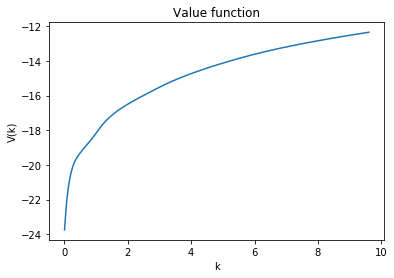

In [10]:
x = np.linspace(kmin, kmax, num=test_num)
y = model.predict([x])

np.savetxt("value.csv", y, delimiter=",")

fig = plt.figure()
plt.plot(x,y)

plt.xlabel('k')
plt.ylabel('V(k)')
plt.title('Value function')
plt.show()

fig.savefig("value.pdf", bbox_inches='tight')

In [11]:
np.savetxt("HJB.csv", iteration_error, delimiter=",")

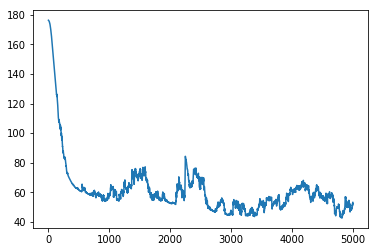

In [12]:
plt.plot(iteration_error)

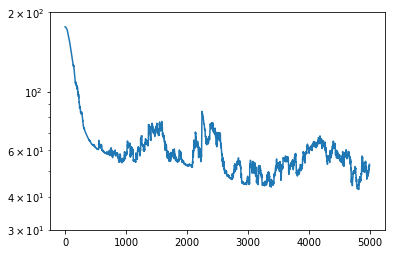

In [13]:
fig = plt.figure()
plotError = np.take(iteration_error, range(update))
plt.ylim(30, 200)
plt.semilogy(plotError)

fig.savefig("HJB.pdf", bbox_inches='tight')